# Hot 100 analysis
Includes all analysis related to billbaord charts. versus grammys.

In [ ]:
import pandas as pd
hot100_df= pd.read_csv("hot100_FINAL.csv")


In [ ]:
artists_df= pd.read_csv("artists_data_FINAL_WIN_INDICATOR.csv")
artists_df #2305 rows × 17 columns

Unnamed: 0 ArtistID     Main Artist  Spotify Found  \
0              0       A0       Aerosmith            1.0   
1              1       A1          Monica            1.0   
2              2       A2  Jennifer Paige            1.0   
3              3       A3           Usher            1.0   
4              4       A4          Brandy            1.0   
...          ...      ...             ...            ...   
2300        2300    A2300      Steely Dan            0.0   
2301        2301    A2301      Paul Simon            0.0   
2302        2302    A2302    Shelby Lynne            0.0   
2303        2303    A2303              JT            0.0   
2304        2304    A2304      Ybn Cordae            0.0   

                    Full Name        Country  Birth Date  Group Members  \
0                         NaN  United States         NaN            5.0   
1        Monica Denise Arnold  United States  1980-10-24            1.0   
2                         NaN  United States  1973-09-03            1.0   
3      Usher Raymond IV[1][2]  United States  1978-10-14            1.0   
4       Brandy Rayana Norwood  United States  1979-02-11            1.0   
...                       ...            ...         ...            ...   
2300                      NaN  United States         NaN           13.0   
2301                      NaN  United States  1941-10-13            1.0   
2302                      NaN  United States  1968-10-22            1.0   
2303  Jatavia Shakara Johnson  United States  1992-12-03            1.0   
2304     Cordae Amari Dunston  United States  1997-26-08            1.0   

      Found Wiki                                        Wiki URL Gender  \
0              1         https://en.wikipedia.org/wiki/Aerosmith    NaN   
1              1   https://en.wikipedia.org/wiki/Monica_(singer)      F   
2              1    https://en.wikipedia.org/wiki/Jennifer_Paige      F   
3              1  https://en.wikipedia.org/wiki/Usher_(musician)      M   
4              1    https://en.wikipedia.org/wiki/Brandy_Norwood      F   
...          ...                                             ...    ...   
2300           1        https://en.wikipedia.org/wiki/Steely_Dan    NaN   
2301           1        https://en.wikipedia.org/wiki/Paul_Simon      M   
2302           1      https://en.wikipedia.org/wiki/Shelby_Lynne      F   
2303           1       https://en.wikipedia.org/wiki/JT_(rapper)      F   
2304           1            https://en.wikipedia.org/wiki/Cordae      M   

     Cleaned Main Artist        US State State ID  nb wins  nb nominations  \
0              Aerosmith   Massachusetts       MA       -1               0   
1                 Monica         Georgia       GA       -1               0   
2         Jennifer Paige         Georgia       GA       -1               0   
3                  Usher           Texas       TX        0               1   
4                 Brandy     Mississippi       MS       -1               0   
...                  ...             ...      ...      ...             ...   
2300          Steely Dan        New York       NY       -1               0   
2301          Paul Simon        New York       NY       -1               0   
2302        Shelby Lynne        Virginia       VA       -1               0   
2303                  Jt         Florida       FL       -1               0   
2304          Ybn Cordae  North Carolina       NC        0               1   

      win rate  
0          NaN  
1          NaN  
2          NaN  
3          0.0  
4          NaN  
...        ...  
2300       NaN  
2301       NaN  
2302       NaN  
2303       NaN  
2304       0.0  

[2305 rows x 17 columns]

In [ ]:
hot100_df #135800 rows × 11 columns

The Week  Rank                         Title  \
0       Week of September 26, 1998     1  I Don't Want To Miss A Thing   
1       Week of September 26, 1998     2               The First Night   
2       Week of September 26, 1998     3                         Crush   
3       Week of September 26, 1998     4                        My Way   
4       Week of September 26, 1998     5               The Boy Is Mine   
...                            ...   ...                           ...   
135795  Week of September 28, 2024    96               U My Everything   
135796  Week of September 28, 2024    97              My Kink Is Karma   
135797  Week of September 28, 2024    98                         Nasty   
135798  Week of September 28, 2024    99                   Parking Lot   
135799  Week of September 28, 2024   100                     Worst Way   

                        Artist Last Week  Peak Pos  Weeks on Chart  \
0                    Aerosmith         1         1               4   
1                       Monica         2         2               7   
2               Jennifer Paige         3         3              13   
3                        Usher         4         2              15   
4              Brandy & Monica         5         1              18   
...                        ...       ...       ...             ...   
135795       Sexyy Red & Drake        89        44              17   
135796           Chappell Roan         -        81               5   
135797                 Tinashe        94        61              16   
135798  Mustard & Travis Scott        99        57               8   
135799             Riley Green         -       100               1   

           Main Artist Charting Week  Song ID ArtistID  
0            Aerosmith    1998-09-26       S0       A0  
1               Monica    1998-09-26       S1       A1  
2       Jennifer Paige    1998-09-26       S2       A2  
3                Usher    1998-09-26       S3       A3  
4                  NaN    1998-09-26       S4       A4  
...                ...           ...      ...      ...  
135795             NaN    2024-09-28  S134143    A2168  
135796   Chappell Roan    2024-09-28  S135190    A2223  
135797         Tinashe    2024-09-28  S134289    A1521  
135798             NaN    2024-09-28  S134556    A1877  
135799     Riley Green    2024-09-28  S135799    A1882  

[135800 rows x 11 columns]

In [ ]:
#convert to time
hot100_df['Charting Week'] = pd.to_datetime(hot100_df['Charting Week'])

#Longetivity of songs on charts

In [ ]:
# longevity_df = hot100_df.groupby('Song ID')['Charting Week'].agg(['min', 'max']) #11451 rows × 2 columns
longevity_df = hot100_df.groupby("Song ID").agg(weeks_on_chart=("Charting Week", "nunique")) #11451 rows × 1 columns
longevity_df

weeks_on_chart
Song ID                
S0                   17
S1                   17
S10                  10
S1000                18
S100026               2
...                 ...
S9996                22
S99970               30
S99973                3
S99993                2
S99997               19

[11451 rows x 1 columns]

In [ ]:
longevity_df = longevity_df.merge(hot100_df[["Song ID","ArtistID", "Title","Artist"]].drop_duplicates("Song ID"), on='Song ID', how='left')
longevity_df.rename(columns={'weeks_on_chart': 'Nb of Weeks on Chart'}, inplace=True)
longevity_df #11451 rows × 5 columns

Song ID  Nb of Weeks on Chart ArtistID                         Title  \
0           S0                    17       A0  I Don't Want To Miss A Thing   
1           S1                    17       A1               The First Night   
2          S10                    10      A10        When The Lights Go Out   
3        S1000                    18     A141                I'm Your Angel   
4      S100026                     2     A967         Call It What You Want   
...        ...                   ...      ...                           ...   
11446    S9996                    22     A113            Best Of Intentions   
11447   S99970                    30    A1786                Ric Flair Drip   
11448   S99973                     3    A1702                  Rap Saved Me   
11449   S99993                     2    A1702         My Choppa Hate N****s   
11450   S99997                    19    A1787                     All On Me   

                                                 Artist  
0                                             Aerosmith  
1                                                Monica  
2                                                  Five  
3                                R. Kelly & Celine Dion  
4                                          Taylor Swift  
...                                                 ...  
11446                                      Travis Tritt  
11447                             Offset & Metro Boomin  
11448  21 Savage, Offset & Metro Boomin Featuring Quavo  
11449                          21 Savage & Metro Boomin  
11450                                      Devin Dawson  

[11451 rows x 5 columns]

In [ ]:
longevity_df = longevity_df.merge(artists_df[["ArtistID", "Main Artist",'Country',"State ID"]], on='ArtistID', how='left')
longevity_df #11451 rows × 8 columns

Song ID  Nb of Weeks on Chart ArtistID                         Title  \
0           S0                    17       A0  I Don't Want To Miss A Thing   
1           S1                    17       A1               The First Night   
2          S10                    10      A10        When The Lights Go Out   
3        S1000                    18     A141                I'm Your Angel   
4      S100026                     2     A967         Call It What You Want   
...        ...                   ...      ...                           ...   
11446    S9996                    22     A113            Best Of Intentions   
11447   S99970                    30    A1786                Ric Flair Drip   
11448   S99973                     3    A1702                  Rap Saved Me   
11449   S99993                     2    A1702         My Choppa Hate N****s   
11450   S99997                    19    A1787                     All On Me   

                                                 Artist   Main Artist  \
0                                             Aerosmith     Aerosmith   
1                                                Monica        Monica   
2                                                  Five          Five   
3                                R. Kelly & Celine Dion      R. Kelly   
4                                          Taylor Swift  Taylor Swift   
...                                                 ...           ...   
11446                                      Travis Tritt  Travis Tritt   
11447                             Offset & Metro Boomin        Offset   
11448  21 Savage, Offset & Metro Boomin Featuring Quavo     21 Savage   
11449                          21 Savage & Metro Boomin     21 Savage   
11450                                      Devin Dawson  Devin Dawson   

              Country State ID  
0       United States       MA  
1       United States       GA  
2      United Kingdom      NaN  
3       United States       IL  
4       United States       PA  
...               ...      ...  
11446   United States       GA  
11447   United States       GA  
11448  United Kingdom      NaN  
11449  United Kingdom      NaN  
11450             NaN      NaN  

[11451 rows x 8 columns]

In [ ]:
longevity_df["Nb of Weeks on Chart"].unique() #shouldnt contain any 0


array([17, 10, 18,  2, 21, 16, 24,  1,  4, 19,  6, 13, 15,  9, 11, 14,  8,
        5,  3, 36, 20, 12, 23,  7, 50, 34, 22, 40, 28, 25, 29, 41, 51, 39,
       38, 35, 27, 52, 31, 26, 48, 42, 43, 45, 33, 53, 32, 37, 44, 46, 47,
       49, 30, 54, 61, 90, 62, 69, 77, 91, 57, 56, 63, 66, 70, 55, 60, 58,
       64, 76, 65, 68, 79, 59, 87])

In [ ]:
#on avait une conquille de bilbaord pour une chanson , donc on a gerer ca

hot100_df.loc[64961, ["Peak Pos", "Weeks on Chart"]] = [28, 4]
hot100_df[hot100_df["Song ID"] == "S57684"]

The Week  Rank             Title     Artist Last Week  \
57684  Week of October 10, 2009    85  Somebody To Love  Glee Cast         -   
57727  Week of October 17, 2009    28  Somebody To Love  Glee Cast        85   
57875  Week of October 24, 2009    76  Somebody To Love  Glee Cast        28   
64961     Week of March 5, 2011    62  Somebody To Love  Glee Cast         -   

       Peak Pos  Weeks on Chart Main Artist Charting Week Song ID ArtistID  
57684        85               1   Glee Cast    2009-10-10  S57684    A1176  
57727        28               2   Glee Cast    2009-10-17  S57684    A1176  
57875        28               3   Glee Cast    2009-10-24  S57684    A1176  
64961        28               4   Glee Cast    2011-03-05  S57684    A1176

In [ ]:
debut_entries = hot100_df[hot100_df["Weeks on Chart"] == 1]
debut_entries = debut_entries.drop_duplicates("Song ID") #normalement ya rien qui drop

debut_info = debut_entries.set_index("Song ID")[["Rank", "Charting Week"]].to_dict(orient="index")

longevity_df["Debut Rank"] = longevity_df["Song ID"].map(lambda x: debut_info.get(x, {}).get("Rank"))
longevity_df["Debut Week"] = longevity_df["Song ID"].map(lambda x: debut_info.get(x, {}).get("Charting Week"))

longevity_df #11451 rows × 10 columns

Song ID  Nb of Weeks on Chart ArtistID                         Title  \
0           S0                    17       A0  I Don't Want To Miss A Thing   
1           S1                    17       A1               The First Night   
2          S10                    10      A10        When The Lights Go Out   
3        S1000                    18     A141                I'm Your Angel   
4      S100026                     2     A967         Call It What You Want   
...        ...                   ...      ...                           ...   
11446    S9996                    22     A113            Best Of Intentions   
11447   S99970                    30    A1786                Ric Flair Drip   
11448   S99973                     3    A1702                  Rap Saved Me   
11449   S99993                     2    A1702         My Choppa Hate N****s   
11450   S99997                    19    A1787                     All On Me   

                                                 Artist   Main Artist  \
0                                             Aerosmith     Aerosmith   
1                                                Monica        Monica   
2                                                  Five          Five   
3                                R. Kelly & Celine Dion      R. Kelly   
4                                          Taylor Swift  Taylor Swift   
...                                                 ...           ...   
11446                                      Travis Tritt  Travis Tritt   
11447                             Offset & Metro Boomin        Offset   
11448  21 Savage, Offset & Metro Boomin Featuring Quavo     21 Savage   
11449                          21 Savage & Metro Boomin     21 Savage   
11450                                      Devin Dawson  Devin Dawson   

              Country State ID  Debut Rank Debut Week  
0       United States       MA         NaN        NaT  
1       United States       GA         NaN        NaT  
2      United Kingdom      NaN         NaN        NaT  
3       United States       IL         1.0 1998-12-05  
4       United States       PA        27.0 2017-11-25  
...               ...      ...         ...        ...  
11446   United States       GA        97.0 2000-08-19  
11447   United States       GA        71.0 2017-11-18  
11448  United Kingdom      NaN        74.0 2017-11-18  
11449  United Kingdom      NaN        94.0 2017-11-18  
11450             NaN      NaN        98.0 2017-11-18  

[11451 rows x 10 columns]

## longets charting songs

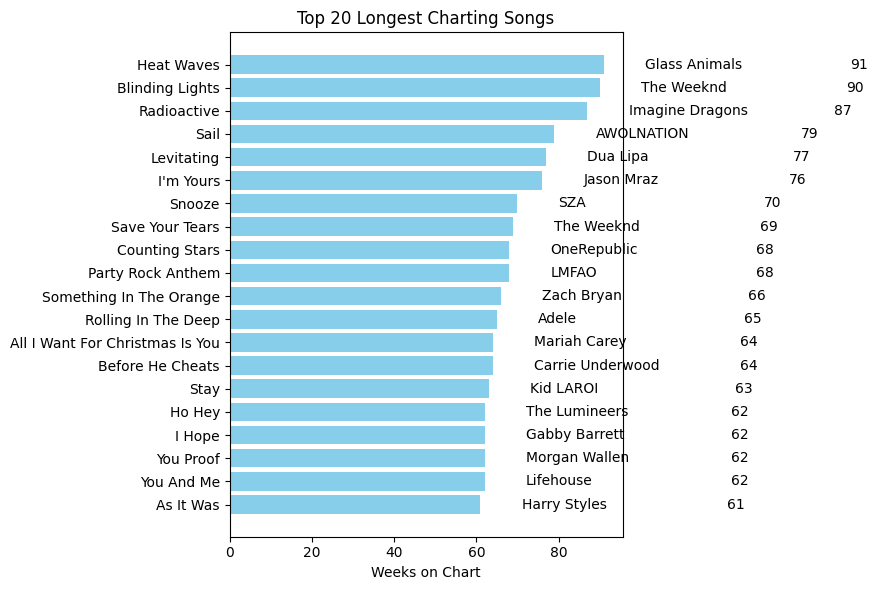

In [ ]:
#longets chartign songs
import matplotlib.pyplot as plt
# Sort the DataFrame and take the top 20
top_songs = longevity_df.sort_values("Nb of Weeks on Chart", ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_songs["Title"], top_songs["Nb of Weeks on Chart"], color='skyblue')

# Set a padding to ensure there's enough space between text and bar
padding = 10

# Add labels on the x-axis and bar heights next to bars
for i, bar in enumerate(bars):
    artist_name = top_songs["Main Artist"].iloc[i]
    weeks_on_chart = bar.get_width()

    # Place artist name at the right of the bar
    artist_text_x = bar.get_width() + padding
    plt.text(
        artist_text_x,  # X position for artist name
        bar.get_y() + bar.get_height() / 2,  # Y position at the center of the bar
        f"{artist_name}",  # Artist name
        va='center',  # Vertical alignment: center
        ha='left',  # Horizontal alignment: left
        fontsize=10
    )

    # Place bar height next to the artist name
    height_text_x = artist_text_x + 50  # Add extra padding for height text
    plt.text(
        height_text_x,  # X position for weeks on chart
        bar.get_y() + bar.get_height() / 2,  # Y position at the center of the bar
        f"{weeks_on_chart}",  # Weeks on chart
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Labels and title
plt.xlabel("Weeks on Chart")
plt.title("Top 20 Longest Charting Songs")
plt.gca().invert_yaxis()  # So the longest is on top
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
songs_df= pd.read_csv("songs_data_FINAL.csv") # all songs, either from grammys or from billbaord
songs_df #11489 rows × 22 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  Spotify Found Release Date  \
0      I Don't Want To Miss A Thing EP  ...              1   1998-08-18   
1                      The Boy Is Mine  ...              1   1998-07-07   
2                       Jennifer Paige  ...              1   1998-06-16   
3                               My Way  ...              1   1997-09-16   
4              the boy is mine (Remix)  ...              1   1998-05-19   
...                                ...  ...            ...          ...   
11484                     Raising Sand  ...              1   2007-10-23   
11485                     Ego Trippin'  ...              1   2007-11-20   
11486             Genius Loves Company  ...              1          NaN   
11487                         The Wind  ...              1   2003-08-26   
11488  All That You Can't Leave Be

In [ ]:
songs_charts_df = songs_df.merge(longevity_df[["Song ID", "Nb of Weeks on Chart","Debut Rank","Debut Week","State ID"]], on='Song ID', how='left')
songs_charts_df #11489 rows × 26 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  \
0      I Don't Want To Miss A Thing EP  ...   
1                      The Boy Is Mine  ...   
2                       Jennifer Paige  ...   
3                               My Way  ...   
4              the boy is mine (Remix)  ...   
...                                ...  ...   
11484                     Raising Sand  ...   
11485                     Ego Trippin'  ...   
11486             Genius Loves Company  ...   
11487                         The Wind  ...   
11488  All That You Can't Leave Behind  ...   

                                                  Lyrics        Genre  \
0      I could stay awake just to hear you breathing\...         Rock   
1      [JD:]\r\nBaby baby tell me whats up? Can you h...          R&B   
2      See ya blowin' me a kiss\r\nIt doesn't take a ...          Pop   
3 

In [ ]:
songs_charts_df['Nb of Weeks on Chart'] = songs_charts_df['Nb of Weeks on Chart'].fillna(0) #if u have nan value it means u never charted , so 0 weeks
songs_charts_df #11489 rows × 26 columns


Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  \
0      I Don't Want To Miss A Thing EP  ...   
1                      The Boy Is Mine  ...   
2                       Jennifer Paige  ...   
3                               My Way  ...   
4              the boy is mine (Remix)  ...   
...                                ...  ...   
11484                     Raising Sand  ...   
11485                     Ego Trippin'  ...   
11486             Genius Loves Company  ...   
11487                         The Wind  ...   
11488  All That You Can't Leave Behind  ...   

                                                  Lyrics        Genre  \
0      I could stay awake just to hear you breathing\...         Rock   
1      [JD:]\r\nBaby baby tell me whats up? Can you h...          R&B   
2      See ya blowin' me a kiss\r\nIt doesn't take a ...          Pop   
3 

In [ ]:
songs_charts_df.to_csv("songs_in_charts_data.csv", index=False)

In [ ]:
# on veut comparer les chansons grammy and les chansons billbaord, donc la on va merger le tableau grammy au tableau
grammys_df= pd.read_csv("grammys_data_FINAL.csv")
grammys_df #413x12

Grammy  Year            Category      Main Artist  \
0        67  2024  Record Of The Year   Kendrick Lamar   
1        67  2024  Record Of The Year     Taylor Swift   
2        67  2024  Record Of The Year    Chappell Roan   
3        67  2024  Record Of The Year    Billie Eilish   
4        67  2024  Record Of The Year       Charli Xcx   
..      ...   ...                 ...              ...   
408      43  2000    Song Of The Year               U2   
409      43  2000    Song Of The Year  Destiny'S Child   
410      43  2000    Song Of The Year        Macy Gray   
411      43  2000    Song Of The Year   Lee Ann Womack   
412      43  2000    Song Of The Year       Faith Hill   

                                 Artist Cleaned Song or Album  \
0                        Kendrick Lamar           Not Like Us   
1    Taylor Swift Featuring Post Malone             Fortnight   
2                         Chappell Roan       Good Luck Babe!   
3                         Billie Eilish    Birds Of A Feather   
4                            Charli xcx                   360   
..                                  ...                   ...   
408                                  U2         Beautiful Day   
409                     Destiny's Child           Say My Name   
410                           Macy Gray                 I Try   
411                      Lee Ann Womack      I Hope You Dance   
412                          Faith Hill               Breathe   

          Song or Album  Win Cleaned Main Artist  \
0           Not Like Us    1      Kendrick Lamar   
1             Fortnight    0        Taylor Swift   
2      Good Luck, Babe!    0       Chappell Roan   
3    BIRDS OF A FEATHER    0       Billie Eilish   
4                   360    0          Charli Xcx   
..                  ...  ...                 ...   
408       Beautiful Day    1                  U2   
409        Say My Name     0      Destinys Child   
410              I Try     0           Macy Gray   
411   I Hope You Dance     0      Lee Ann Womack   
412            Breathe     0          Faith Hill   

                                         Wiki URL ArtistID  Song ID  
0    https://en.wikipedia.org/wiki/Kendrick_Lamar    A1382  S133800  
1      https://en.wikipedia.org/wiki/Taylor_Swift     A967  S133600  
2     https://en.wikipedia.org/wiki/Chappell_Roan    A2223  S133476  
3     https://en.wikipedia.org/wiki/Billie_Eilish    A1833  S134012  
4        https://en.wikipedia.org/wiki/Charli_XCX    A1524  S134372  
..                                            ...      ...      ...  
408              https://en.wikipedia.org/wiki/U2     A166   S10674  
409                                           NaN     A270    S6582  
410       https://en.wikipedia.org/wiki/Macy_Gray     A352    S7367  
411  https://en.wikipedia.org/wiki/Lee_Ann_Womack     A109    S8582  
412      https://en.wikipedia.org/wiki/Faith_Hill      A12    S5880  

[413 rows x 12 columns]

In [ ]:
nominations = grammys_df.groupby("Song ID").size().rename("Nb Nominations") #how many tmes a song got nominates incluing wins and losses
wins = grammys_df[grammys_df["Win"] == 1].groupby("Song ID").size().rename("Nb Wins") #how many times a song won



In [ ]:
grammy_stats = pd.concat([nominations, wins], axis=1).fillna(0)

grammy_stats["Nb Nominations"] = grammy_stats["Nb Nominations"].astype(int)
grammy_stats["Nb Wins"] = grammy_stats["Nb Wins"].astype(int)

songs_charts_df = songs_charts_df.merge(grammy_stats, on="Song ID", how="left")
songs_charts_df #11489 rows × 28 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...       Tempo  Loudness  \
0      I Don't Want To Miss A Thing EP  ...  133.256699  0.944479   
1                      The Boy Is Mine  ...  152.175323  0.919360   
2                       Jennifer Paige  ...  115.030586  0.918512   
3                               My Way  ...   90.065628  0.866996   
4              the boy is mine (Remix)  ...   93.010178  0.911099   
...                                ...  ...         ...       ...   
11484                     Raising Sand  ...  143.284012  0.816425   
11485                     Ego Trippin'  ...  120.200836  0.897351   
11486             Genius Loves Company  ...  101.891037  0.390478   
11487                         The Wind  ...   89.039650  0.854393   
11488  All That You Can't Leave Behind  ...  102.982781  0.935261   

       Cleaned Main Artist Art

In [ ]:
songs_charts_df['Nb Wins'] = songs_charts_df['Nb Wins'].fillna(-1) #if win is nan it means the song never got nominated so win = -1
songs_charts_df['Nb Nominations'] = songs_charts_df['Nb Nominations'].fillna(0) #if nominations is nan means the song never got nominated


In [ ]:
songs_charts_df.to_csv("songs_in_charts_data.csv", index=False)

In [ ]:
songs_charts_df= pd.read_csv("songs_in_charts_data.csv")
songs_charts_df #11489 rows × 28 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...       Tempo  Loudness  \
0      I Don't Want To Miss A Thing EP  ...  133.256699  0.944479   
1                      The Boy Is Mine  ...  152.175323  0.919360   
2                       Jennifer Paige  ...  115.030586  0.918512   
3                               My Way  ...   90.065628  0.866996   
4              the boy is mine (Remix)  ...   93.010178  0.911099   
...                                ...  ...         ...       ...   
11484                     Raising Sand  ...  143.284012  0.816425   
11485                     Ego Trippin'  ...  120.200836  0.897351   
11486             Genius Loves Company  ...  101.891037  0.390478   
11487                         The Wind  ...   89.039650  0.854393   
11488  All That You Can't Leave Behind  ...  102.982781  0.935261   

       Cleaned Main Artist Art

In [ ]:
grammys_df= pd.read_csv("grammys_data_FINAL.csv")
grammys_df.loc[(grammys_df['Year'] == 2012) & (grammys_df['ArtistID'] == 'A233') & (grammys_df['Song ID'] == 'S31967') , 'Song ID'] = 'S135830'
grammys_df.tocsv("grammys_data_FINAL_fixed.csv", index=False)

In [ ]:
grammys_df.to_csv("grammys_data_FINAL_fixed.csv", index=False)

In [ ]:
grammys_df[(grammys_df['ArtistID']=='A588') & (grammys_df['Song ID']=='S31967')]

Grammy  Year          Category Main Artist      Artist  \
358      47  2004  Song Of The Year  John Mayer  John Mayer   

    Cleaned Song or Album Song or Album  Win Cleaned Main Artist  \
358             Daughters     Daughters    1          John Mayer   

                                     Wiki URL ArtistID Song ID  
358  https://en.wikipedia.org/wiki/John_Mayer     A588  S31967

In [ ]:
songs_charts_df.loc[(songs_charts_df['ArtistID']=='A588') & (songs_charts_df['Song ID']=='S31967'), ['Nb Nominations', 'Nb Wins']]= [1,1]
songs_charts_df[(songs_charts_df['ArtistID']=='A588') & (songs_charts_df['Song ID']=='S31967')]

Song ID      Title Cleaned Title      Artist Main Artist Feat  \
2012  S31967  Daughters     Daughters  John Mayer  John Mayer  NaN   

     Song Writers/Credits  Producer           Label           Album  ...  \
2012              J.Mayer  J.J.Puig  Aware/Columbia  Heavier Things  ...   

      Cleaned Main Artist ArtistID  Nb of Weeks on Chart Debut Rank  \
2012           John Mayer     A588                  23.0       68.0   

      Debut Week  State ID Nb Nominations Nb Wins  Status  Is Nominated  
2012  2004-11-06       NaN            1.0     1.0  Winner     Nominated  

[1 rows x 30 columns]

In [ ]:
grammys_df[(grammys_df['ArtistID']=='A233') & (grammys_df['Song ID']=='S135830')]


Grammy  Year       Category Main Artist Artist Cleaned Song or Album  \
246      55  2012  Best Rap Song         Nas    Nas             Daughters   

    Song or Album  Win Cleaned Main Artist                           Wiki URL  \
246     Daughters    0                 Nas  https://en.wikipedia.org/wiki/Nas   

    ArtistID  Song ID  
246     A233  S135830

In [ ]:
songs_charts_df.loc[(songs_charts_df['ArtistID']=='A233') & (songs_charts_df['Song ID']=='S135830'), ['Nb Nominations', 'Nb Wins', 'Status', 'Is Nominated']]= [1,0, 'Nominated (Non-Winner)','Nominated']
songs_charts_df[(songs_charts_df['ArtistID']=='A233') &(songs_charts_df['Song ID']=='S135830') ]

Song ID      Title Cleaned Title Artist Main Artist Feat  \
11481  S135830  Daughters     Daughters    Nas         Nas  NaN   

      Song Writers/Credits Producer Label      Album  ...  \
11481                  NaN      NaN   NaN  Alligator  ...   

       Cleaned Main Artist ArtistID  Nb of Weeks on Chart Debut Rank  \
11481                  Nas     A233                   0.0        NaN   

      Debut Week  State ID Nb Nominations Nb Wins                  Status  \
11481        NaN       NaN            1.0     0.0  Nominated (Non-Winner)   

       Is Nominated  
11481     Nominated  

[1 rows x 30 columns]

In [ ]:
grammys_df.to_csv("grammys_data_FINAL_fixed.csv", index=False)
songs_charts_df.to_csv("songs_in_charts_data_fixed.csv", index=False)



In [ ]:
def categorize(row):
    if row['Nb Wins'] > 0:
        return 'Winner'
    elif row['Nb Wins'] == 0 and row['Nb Nominations']>0:
        return 'Nominated (Non-Winner)'
    else:
        return 'Non-Nominated'

def categorize_bynominated(row):
    if row['Nb Nominations'] > 0:
        return 'Nominated'
    else:
        return 'Not Nominated'

songs_charts_df['Status'] = songs_charts_df.apply(categorize, axis=1)
songs_charts_df['Is Nominated'] = songs_charts_df.apply(categorize_bynominated, axis=1)

In [ ]:
songs_charts_df #11489 rows × 30 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  Cleaned Main Artist ArtistID  \
0      I Don't Want To Miss A Thing EP  ...            Aerosmith       A0   
1                      The Boy Is Mine  ...               Monica       A1   
2                       Jennifer Paige  ...       Jennifer Paige       A2   
3                               My Way  ...                Usher       A3   
4              the boy is mine (Remix)  ...               Brandy       A4   
...                                ...  ...                  ...      ...   
11484                     Raising Sand  ...         Robert Plant    A2293   
11485                     Ego Trippin'  ...           Snoop Dogg      A17   
11486             Genius Loves Company  ...          Ray Charles    A2297   
11487                         The Wind  ...         Warren Zevon    A2298   
11488  All T

# analysis of grammys songs and charting data
## charting longevity vs WIN vs Nominations

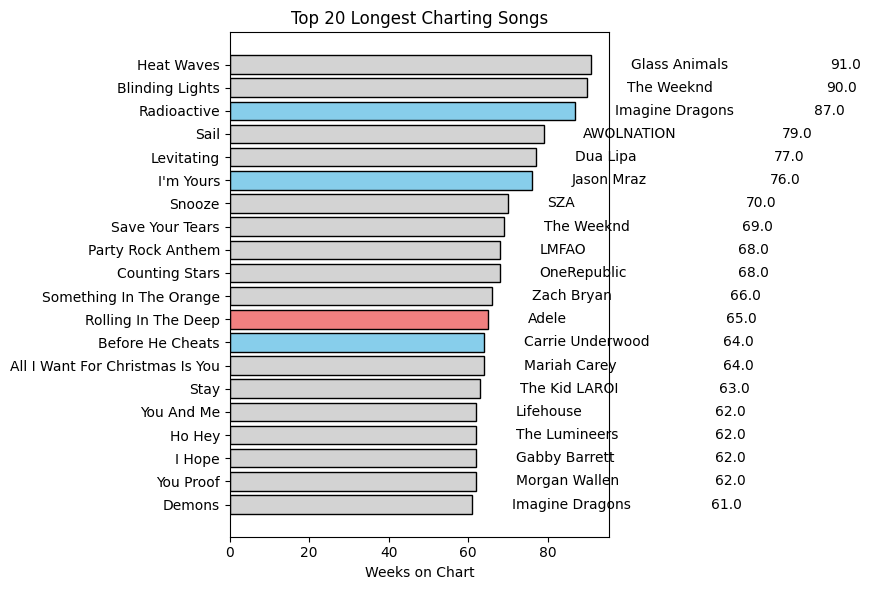

In [ ]:
#longets chartign songs
import matplotlib.pyplot as plt


status_palette={"Winner": "lightcoral", "Nominated (Non-Winner)": "skyblue", "Non-Nominated": "lightgrey"}


top_songs = songs_charts_df.sort_values("Nb of Weeks on Chart", ascending=False).head(20)

# Get colors based on Status column
bar_colors = top_songs["Status"].map(lambda x: status_palette.get(x, 'gray'))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_songs["Title"], top_songs["Nb of Weeks on Chart"], color=bar_colors, edgecolor='black')

# Set a padding for spacing
padding = 10

# Add labels
for i, bar in enumerate(bars):
    artist_name = top_songs["Main Artist"].iloc[i]
    weeks_on_chart = bar.get_width()

    # Artist name
    plt.text(
        bar.get_width() + padding,
        bar.get_y() + bar.get_height() / 2,
        f"{artist_name}",
        va='center',
        ha='left',
        fontsize=10
    )

    # Weeks on chart
    plt.text(
        bar.get_width() + padding + 50,
        bar.get_y() + bar.get_height() / 2,
        f"{weeks_on_chart}",
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Axis labels and title
plt.xlabel("Weeks on Chart")
plt.title("Top 20 Longest Charting Songs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

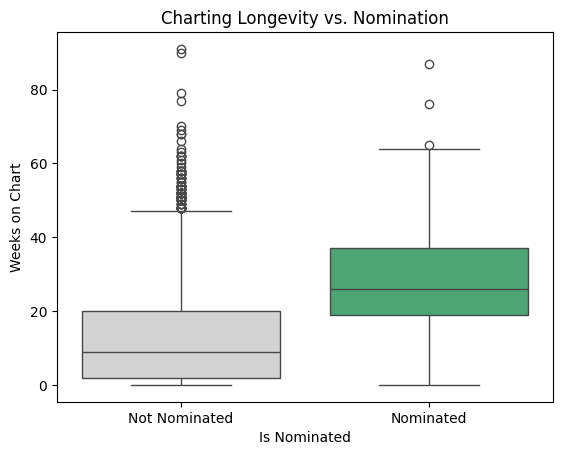

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nomination status (binary)
nominated_palette={'Nominated': "mediumseagreen", 'Not Nominated': "lightgrey"}
sns.boxplot(data=songs_charts_df, x="Is Nominated", y="Nb of Weeks on Chart",hue="Is Nominated",palette=nominated_palette, legend=False)
plt.title("Charting Longevity vs. Nomination")
plt.xlabel("Is Nominated")
plt.ylabel("Weeks on Chart")
plt.show()

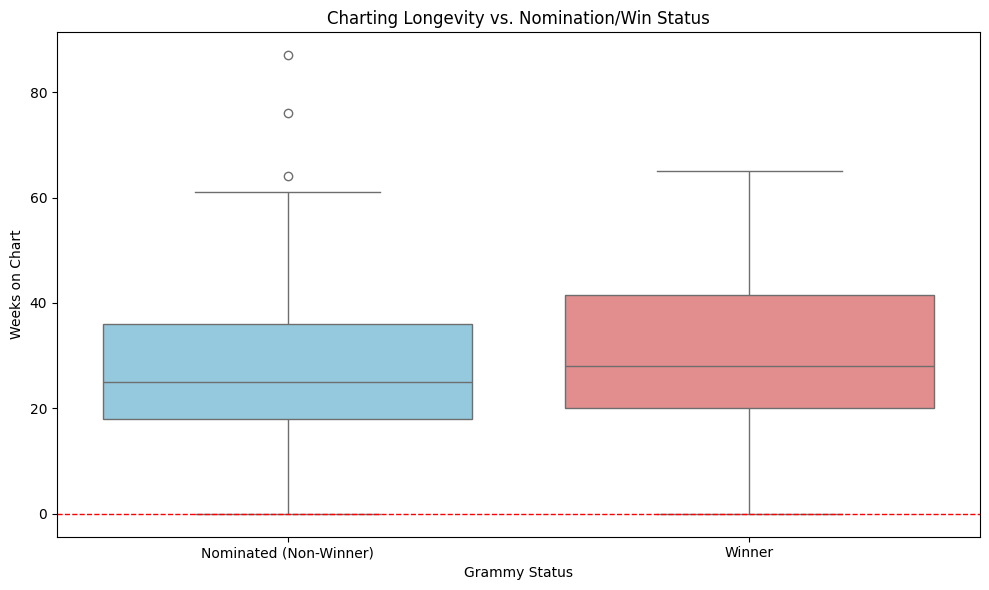

In [ ]:
filtered_songs_charts_df=songs_charts_df[songs_charts_df['Status']!= 'Non-Nominated']

# Plotting in the same figure
# Plotting in the same figure
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=songs_charts_df,
    x="Status",
    y="Nb of Weeks on Chart",
    palette=status_palette,
    hue='Status',
    order=["Nominated (Non-Winner)", "Winner"]
)

# Add horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title("Charting Longevity vs. Nomination/Win Status")
plt.xlabel("Grammy Status")
plt.ylabel("Weeks on Chart")
plt.tight_layout()
plt.show()



In [ ]:
songs_charts_df #11489 rows × 30 columns

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  Cleaned Main Artist ArtistID  \
0      I Don't Want To Miss A Thing EP  ...            Aerosmith       A0   
1                      The Boy Is Mine  ...               Monica       A1   
2                       Jennifer Paige  ...       Jennifer Paige       A2   
3                               My Way  ...                Usher       A3   
4              the boy is mine (Remix)  ...               Brandy       A4   
...                                ...  ...                  ...      ...   
11484                     Raising Sand  ...         Robert Plant    A2293   
11485                     Ego Trippin'  ...           Snoop Dogg      A17   
11486             Genius Loves Company  ...          Ray Charles    A2297   
11487                         The Wind  ...         Warren Zevon    A2298   
11488  All T

In [ ]:
print("Number of unique songs in grammys", songs_charts_df[songs_charts_df["Is Nominated"]== 'Nominated'].shape[0])
print("Number of unique winning songs in grammys", songs_charts_df[songs_charts_df["Status"]== 'Winner'].shape[0])

Number of unique songs in grammys 316
Number of unique winning songs in grammys 59


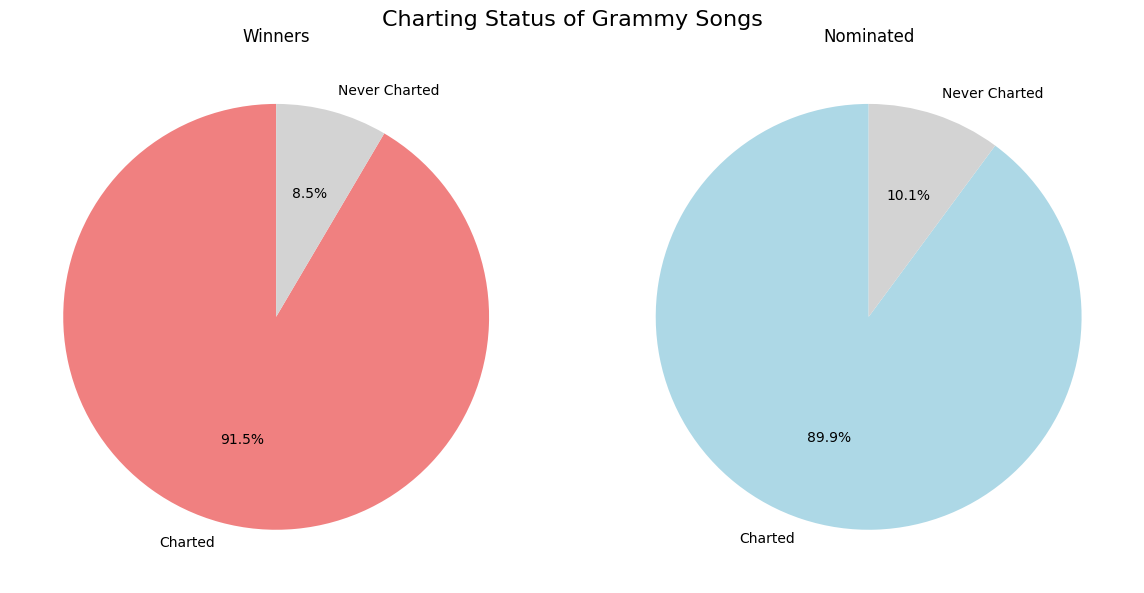

In [ ]:
import matplotlib.pyplot as plt
winners = songs_charts_df[songs_charts_df["Status"] == "Winner"]
nominees_only = songs_charts_df[songs_charts_df["Is Nominated"] == "Nominated"]

# Count for winners
winner_charted = (winners["Nb of Weeks on Chart"] > 0).sum()
winner_not_charted = (winners["Nb of Weeks on Chart"] == 0).sum()

# Count for nominees
nom_charted = (nominees_only["Nb of Weeks on Chart"] > 0).sum()
nom_not_charted = (nominees_only["Nb of Weeks on Chart"] == 0).sum()

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Winners pie chart
axs[0].pie(
    [winner_charted, winner_not_charted],
    labels=["Charted", "Never Charted"],
    colors=["lightcoral", "lightgrey"],
    autopct="%1.1f%%",
    startangle=90
)
axs[0].set_title("Winners")

# Nominees pie chart
axs[1].pie(
    [nom_charted, nom_not_charted],
    labels=["Charted", "Never Charted"],
    colors=["lightblue", "lightgrey"],
    autopct="%1.1f%%",
    startangle=90
)
axs[1].set_title("Nominated")

plt.suptitle("Charting Status of Grammy Songs", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
winner_not_charted

np.int64(5)

In [ ]:
nom_not_charted

np.int64(32)

In [ ]:
songs_charts_df.columns

Index(['Song ID', 'Title', 'Cleaned Title', 'Artist', 'Main Artist', 'Feat',
       'Song Writers/Credits', 'Producer', 'Label', 'Album', 'Duration',
       'Spotify Featured Artists', 'Spotify Found', 'Release Date',
       'Genius Album', 'Genius Found', 'Lyrics', 'Genre', 'Tempo', 'Loudness',
       'Cleaned Main Artist', 'ArtistID', 'Nb of Weeks on Chart', 'Debut Rank',
       'Debut Week', 'State ID', 'Nb Nominations', 'Nb Wins', 'Status',
       'Is Nominated'],
      dtype='object')

In [ ]:
import plotly.express as px

fig = px.scatter(
    songs_charts_df,
    x="Nb of Weeks on Chart",
    y="ArtistID",  # Group by artist, aligns songs from same artist
    color="Status",
    color_discrete_map=status_palette,
    hover_data=["Title", "Main Artist", "Release Date"],
    title="Charting Longevity by Artist and Song Category",
    height=800
)

# Hide y-axis labels (Artist ID) to avoid clutter
fig.update_layout(
    yaxis=dict(title="", showticklabels=False),
    xaxis_title="Weeks on Chart"
)

fig.show()



In [ ]:
print("Nb of songs nominated and non winner that never charted", songs_charts_df[(songs_charts_df["Nb of Weeks on Chart"] == 0) & (songs_charts_df["Status"] =="Nominated (Non-Winner)")].shape[0])
print("Nb of songs winner that never charted",songs_charts_df[(songs_charts_df["Nb of Weeks on Chart"] == 0) & (songs_charts_df["Status"] =="Winner")].shape[0])

Nb of songs nominated and non winner that never charted 27
Nb of songs winner that never charted 5


In [ ]:
# on veut regarder si les artistse qui on ete nominee (won or not), et qui on jamais charte , sont connus ou pas . is it nepotism or me3rifa or what basically.
uncharted_noms_or_wins = songs_charts_df[
    (songs_charts_df["Nb of Weeks on Chart"] == 0) &
    (songs_charts_df["Is Nominated"]=="Nominated")]

artists_with_uncharted_awards = uncharted_noms_or_wins["ArtistID"].unique()

artists_with_uncharted_awards


array(['A2255', 'A2256', 'A2257', 'A1347', 'A642', 'A1013', 'A2259',
       'A2265', 'A1333', 'A500', 'A69', 'A2270', 'A1824', 'A2282',
       'A1807', 'A1382', 'A2286', 'A337', 'A1394', 'A233', 'A2278',
       'A1136', 'A2293', 'A17', 'A2298', 'A166'], dtype=object)

In [ ]:
all_songs_from_those_artists = songs_charts_df[
    songs_charts_df["ArtistID"].isin(artists_with_uncharted_awards)]

In [ ]:
all_songs_from_those_artists

Song ID                   Title           Cleaned Title  \
18         S18         Still A G Thang         Still A G Thang   
73         S73     How's It Goin' Down     How's It Goin' Down   
190      S1065          Sweetest Thing          Sweetest Thing   
249      S1892                    Woof                    Woof   
268      S2193     Ruff Ryders' Anthem     Ruff Ryders' Anthem   
...        ...                     ...                     ...   
11483  S135832     Beg Steal Or Borrow     Beg Steal Or Borrow   
11484  S135833  Please Read The Letter  Please Read The Letter   
11485  S135834         Sexual Eruption         Sexual Eruption   
11487  S135836   Keep Me In Your Heart   Keep Me In Your Heart   
11488  S135837                 Walk On                 Walk On   

                                        Artist     Main Artist  \
18                                  Snoop Dogg      Snoop Dogg   
73                   DMX Featuring Faith Evans             DMX   
190                                         U2              U2   
249    Snoop Dogg Featuring Mystikal And Fiend      Snoop Dogg   
268                                        DMX             DMX   
...                                        ...             ...   
11483       Ray LaMontagne And The Pariah Dogs  Ray Lamontagne   
11484             Robert Plant & Alison Krauss    Robert Plant   
11485                               Snoop Dogg      Snoop Dogg   
11487                             Warren Zevon    Warren Zevon   
11488                                       U2              U2   

                     Feat                      Song Writers/Credits  \
18                    NaN      C.C.Broadus Jr., Zekkariyas, M.Wells   
73            Faith Evans                        E.Sermon, A.Fields   
190                   NaN  Bono, The Edge, A.Clayton, L.Mullen, Jr.   
249    Mystikal And Fiend          C.C.Broadus Jr., Mystikal, Fiend   
268                   NaN                       E.Simmons, K.D.Dean   
...                   ...                                       ...   
11483     The Pariah Dogs                                       NaN   
11484       Alison Krauss                                       NaN   
11485                 NaN                                       NaN   
11487                 NaN                                       NaN   
11488                 NaN                                       NaN   

                            Producer                      Label  \
18                           M.Wells          No Limit/Priority   
73                                PK  Ruff Ryders/Def Jam/IDJMG   
190    S.Lillywhite, D.Lanois, B.Eno               Island/IDJMG   
249                      MP, Craig B          No Limit/Priority   
268                      Swizz Beatz    Ruff Ryders/Def Jam/UMe   
...                              ...                        ...   
11483                            NaN                        NaN   
11484                            NaN                        NaN   
11485                            NaN                        NaN   
11487                            NaN                        NaN   
11488                            NaN                        NaN   

                                                   Album  ...  \
18                 Da Game Is To Be Sold, Not To Be Told  ...   
73               The Definition Of X: Pick Of The Litter  ...   
190                       The Joshua Tree (Super Deluxe)  ...   
249                                     Global Injection  ...   
268                            It's Dark And Hell Is Hot  ...   
...                                                  ...  ...   
11483  God Willin' & The Creek Don't Rise (with The P...  ...   
11484                                       Raising Sand  ...   
11485                                       Ego Trippin'  ...   
11487                                           The Wind  ...   
11488                    All That You Can't Leav

In [ ]:
import plotly.express as px

fig = px.scatter(
    all_songs_from_those_artists,
    x="Nb of Weeks on Chart",
    y="ArtistID",
    color="Status",
    color_discrete_map={
        "Winner": "lightcoral",
        "Nominated (Non-Winner)": "skyblue",
        "Non-Nominated": "lightgrey"
    },
    hover_data=["Title", "Main Artist", "Release Date", "Song ID", "Title"],
    title="Songs by Artists with Uncharted Grammy Recognition",
    height=800
)
fig.update_traces(marker=dict(line=dict(width=1, color='black')))

fig.update_layout(
    yaxis=dict(title="", showticklabels=False),
    xaxis_title="Weeks on Chart"
)

fig.show()


In [ ]:
possible_nepos = all_songs_from_those_artists["ArtistID"].value_counts()

# Step 2: Filter artists with 2 or fewer songs
possible_real_nepos = possible_nepos[possible_nepos <= 2].index

# Step 3: Filter original DataFrame
filtered_df = all_songs_from_those_artists[all_songs_from_those_artists["ArtistID"].isin(possible_real_nepos)]

In [ ]:
possible_real_nepos

Index(['A642', 'A1136', 'A1333', 'A1807', 'A2255', 'A2259', 'A2278', 'A2256',
       'A2265', 'A2270', 'A2282', 'A2286', 'A2293', 'A2298'],
      dtype='object', name='ArtistID')

In [ ]:
filtered_df

Song ID                      Title              Cleaned Title  \
1478    S22975               A.D.I.D.A.S.                A D I D A S   
3460    S52789     You Are The Best Thing     You Are The Best Thing   
4794    S67986              Body And Soul              Body And Soul   
7334   S100990                King's Dead                King's Dead   
11451  S135800                  Asteroids                  Asteroids   
11452  S135801          Not Strong Enough          Not Strong Enough   
11456  S135805     SCIENTISTS & ENGINEERS     Scientists & Engineers   
11458  S135807         Don't Shut Me Down         Don'T Shut Me Down   
11459  S135808             Just Like That             Just Like That   
11461  S135810    I Get A Kick Out Of You    I Get A Kick Out Of You   
11463  S135812  I Still Have Faith In You  I Still Have Faith In You   
11467  S135816                     Colors                     Colors   
11470  S135819                    Hey, Ma                     Hey Ma   
11472  S135821       Bring My Flowers Now       Bring My Flowers Now   
11475  S135824                        Win                        Win   
11477  S135826                      Sassy                      Sassy   
11478  S135827                   Chase Me                   Chase Me   
11482  S135831                   Holocene                   Holocene   
11483  S135832        Beg Steal Or Borrow        Beg Steal Or Borrow   
11484  S135833     Please Read The Letter     Please Read The Letter   
11487  S135836      Keep Me In Your Heart      Keep Me In Your Heart   

                                                  Artist     Main Artist  \
1478                       Killer Mike Featuring Big Boi     Killer Mike   
3460                                      Ray LaMontagne  Ray LaMontagne   
4794                        Tony Bennett & Amy Winehouse    Tony Bennett   
7334      Jay Rock, Kendrick Lamar, Future & James Blake        Jay Rock   
11451                          Rapsody Featuring Hit-Boy         Rapsody   
11452                                          boygenius       Boygenius   
11456  Killer Mike Featuring André 3000, Future And E...     Killer Mike   
11458                                               ABBA            Abba   
11459                                       Bonnie Raitt    Bonnie Raitt   
11461                           Tony Bennett & Lady Gaga    Tony Bennett   
11463                                               ABBA            Abba   
11467                                        Black Pumas     Black Pumas   
11470                                           Bon Iver        Bon Iver   
11472                                       Tanya Tucker    Tanya Tucker   
11475                                           Jay Rock        Jay Rock   
11477                                            Rapsody         Rapsody   
11478    Danger Mouse Featuring Run The Jewels & Big Boi    Danger Mouse   
11482                                           Bon Iver        Bon Iver   
11483                 Ray LaMontagne And The Pariah Dogs  Ray Lamontagne   
11484                       Robert Plant & Alison Krauss    Robert Plant   
11487                                       Warren Zevon    Warren Zevon   

                                         Feat  \
1478                                  Big Boi   
3460                                      NaN   
4794                            Amy Winehouse   
7334     Kendrick Lamar, Future & James Blake   
11451                                 Hit-Boy   
11452                                     NaN   
11456  André 3000, Future And Eryn Allen Kane   
11458                                     NaN   
11459                                     NaN   
11461                               Lady Gaga   
11463                                     NaN   
11467                                     NaN   
11470                                     NaN   
11472                                     NaN   
11475         

In [ ]:

filtered_df[filtered_df['ArtistID']=="A1136"]['Release Date']# hats why it doesnt appear

3460     2008-08-26
11483           NaN
Name: Release Date, dtype: object

In [ ]:
import plotly.express as px

fig = px.scatter(
    filtered_df,
    x="Release Date",     # or 'Year' if that's your column
    y="Main Artist",
    color="Status",
    color_discrete_map={
        "Winner": "lightcoral",
        "Nominated (Non-Winner)": "skyblue",
        "Non-Nominated": "lightgrey"
    },
    hover_data=["Title", "Release Date", 'ArtistID', "Song ID"],  # Add more info if you want
    title="Songs by artist who won or got nominated for a song that didn't chart, and who don't have a big discography (<=1 charting song)"
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(height=600)
fig.show()


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# is nb of weeks on chart significant to get a nomination
group1 = songs_charts_df[songs_charts_df["Is Nominated"] == "Nominated"]["Nb of Weeks on Chart"]
group2 = songs_charts_df[songs_charts_df["Is Nominated"] == "Not Nominated"]["Nb of Weeks on Chart"]

stat, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U test BETWEEN NOMINATED VS NON NOMINATED -> NB OF WEEKS CHARTED ",stat," p-value:", p_value)


group1 = songs_charts_df[songs_charts_df["Status"]=="Winner"]["Nb of Weeks on Chart"]
group2 = songs_charts_df[songs_charts_df["Status"]=="Nominated (Non-Winner)"]["Nb of Weeks on Chart"]

stat, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U test BETWEEN NOMINATED AND WINNER -> nb of weeks charted",stat," p-value:", p_value)

Mann-Whitney U test BETWEEN NOMINATED VS NON NOMINATED -> NB OF WEEKS CHARTED  2688370.5  p-value: 9.596093834978067e-58
Mann-Whitney U test BETWEEN NOMINATED AND WINNER -> nb of weeks charted 8561.0  p-value: 0.121436688650678


In [ ]:
grammys_df=pd.read_csv("grammys_data_FINAL_fixed.csv")
grammys_df

Grammy  Year            Category      Main Artist  \
0        67  2024  Record Of The Year   Kendrick Lamar   
1        67  2024  Record Of The Year     Taylor Swift   
2        67  2024  Record Of The Year    Chappell Roan   
3        67  2024  Record Of The Year    Billie Eilish   
4        67  2024  Record Of The Year       Charli Xcx   
..      ...   ...                 ...              ...   
408      43  2000    Song Of The Year               U2   
409      43  2000    Song Of The Year  Destiny'S Child   
410      43  2000    Song Of The Year        Macy Gray   
411      43  2000    Song Of The Year   Lee Ann Womack   
412      43  2000    Song Of The Year       Faith Hill   

                                 Artist Cleaned Song or Album  \
0                        Kendrick Lamar           Not Like Us   
1    Taylor Swift Featuring Post Malone             Fortnight   
2                         Chappell Roan       Good Luck Babe!   
3                         Billie Eilish    Birds Of A Feather   
4                            Charli xcx                   360   
..                                  ...                   ...   
408                                  U2         Beautiful Day   
409                     Destiny's Child           Say My Name   
410                           Macy Gray                 I Try   
411                      Lee Ann Womack      I Hope You Dance   
412                          Faith Hill               Breathe   

          Song or Album  Win Cleaned Main Artist  \
0           Not Like Us    1      Kendrick Lamar   
1             Fortnight    0        Taylor Swift   
2      Good Luck, Babe!    0       Chappell Roan   
3    BIRDS OF A FEATHER    0       Billie Eilish   
4                   360    0          Charli Xcx   
..                  ...  ...                 ...   
408       Beautiful Day    1                  U2   
409        Say My Name     0      Destinys Child   
410              I Try     0           Macy Gray   
411   I Hope You Dance     0      Lee Ann Womack   
412            Breathe     0          Faith Hill   

                                         Wiki URL ArtistID  Song ID  
0    https://en.wikipedia.org/wiki/Kendrick_Lamar    A1382  S133800  
1      https://en.wikipedia.org/wiki/Taylor_Swift     A967  S133600  
2     https://en.wikipedia.org/wiki/Chappell_Roan    A2223  S133476  
3     https://en.wikipedia.org/wiki/Billie_Eilish    A1833  S134012  
4        https://en.wikipedia.org/wiki/Charli_XCX    A1524  S134372  
..                                            ...      ...      ...  
408              https://en.wikipedia.org/wiki/U2     A166   S10674  
409                                           NaN     A270    S6582  
410       https://en.wikipedia.org/wiki/Macy_Gray     A352    S7367  
411  https://en.wikipedia.org/wiki/Lee_Ann_Womack     A109    S8582  
412      https://en.wikipedia.org/wiki/Faith_Hill      A12    S5880  

[413 rows x 12 columns]

In [ ]:
# contrasting the song to its competitors
grammys_df= pd.merge(grammys_df, songs_charts_df[['Song ID', 'Nb of Weeks on Chart', 'Debut Rank']], how='left', on='Song ID' )
grammys_df #413 rows × 14 columns

Grammy  Year            Category      Main Artist  \
0        67  2024  Record Of The Year   Kendrick Lamar   
1        67  2024  Record Of The Year     Taylor Swift   
2        67  2024  Record Of The Year    Chappell Roan   
3        67  2024  Record Of The Year    Billie Eilish   
4        67  2024  Record Of The Year       Charli Xcx   
..      ...   ...                 ...              ...   
408      43  2000    Song Of The Year               U2   
409      43  2000    Song Of The Year  Destiny'S Child   
410      43  2000    Song Of The Year        Macy Gray   
411      43  2000    Song Of The Year   Lee Ann Womack   
412      43  2000    Song Of The Year       Faith Hill   

                                 Artist Cleaned Song or Album  \
0                        Kendrick Lamar           Not Like Us   
1    Taylor Swift Featuring Post Malone             Fortnight   
2                         Chappell Roan       Good Luck Babe!   
3                         Billie Eilish    Birds Of A Feather   
4                            Charli xcx                   360   
..                                  ...                   ...   
408                                  U2         Beautiful Day   
409                     Destiny's Child           Say My Name   
410                           Macy Gray                 I Try   
411                      Lee Ann Womack      I Hope You Dance   
412                          Faith Hill               Breathe   

          Song or Album  Win Cleaned Main Artist  \
0           Not Like Us    1      Kendrick Lamar   
1             Fortnight    0        Taylor Swift   
2      Good Luck, Babe!    0       Chappell Roan   
3    BIRDS OF A FEATHER    0       Billie Eilish   
4                   360    0          Charli Xcx   
..                  ...  ...                 ...   
408       Beautiful Day    1                  U2   
409        Say My Name     0      Destinys Child   
410              I Try     0           Macy Gray   
411   I Hope You Dance     0      Lee Ann Womack   
412            Breathe     0          Faith Hill   

                                         Wiki URL ArtistID  Song ID  \
0    https://en.wikipedia.org/wiki/Kendrick_Lamar    A1382  S133800   
1      https://en.wikipedia.org/wiki/Taylor_Swift     A967  S133600   
2     https://en.wikipedia.org/wiki/Chappell_Roan    A2223  S133476   
3     https://en.wikipedia.org/wiki/Billie_Eilish    A1833  S134012   
4        https://en.wikipedia.org/wiki/Charli_XCX    A1524  S134372   
..                                            ...      ...      ...   
408              https://en.wikipedia.org/wiki/U2     A166   S10674   
409                                           NaN     A270    S6582   
410       https://en.wikipedia.org/wiki/Macy_Gray     A352    S7367   
411  https://en.wikipedia.org/wiki/Lee_Ann_Womack     A109    S8582   
412      https://en.wikipedia.org/wiki/Faith_Hill      A12    S5880   

     Nb of Weeks on Chart  Debut Rank  
0                    20.0         1.0  
1                    20.0         1.0  
2                    24.0        77.0  
3                    18.0        13.0  
4                    15.0        73.0  
..                    ...         ...  
408                  25.0        75.0  
409                  32.0        83.0  
410                  27.0        68.0  
411                  48.0        83.0  
412                  53.0        81.0  

[413 rows x 14 columns]

In [ ]:
# grammys_df.loc[grammys_df['Song ID']=='\tS83200', ['Song ID']]= 'S83200'
# grammys_df.loc[grammys_df['Song ID']=='\tS21761', ['Song ID']]= 'S21761'

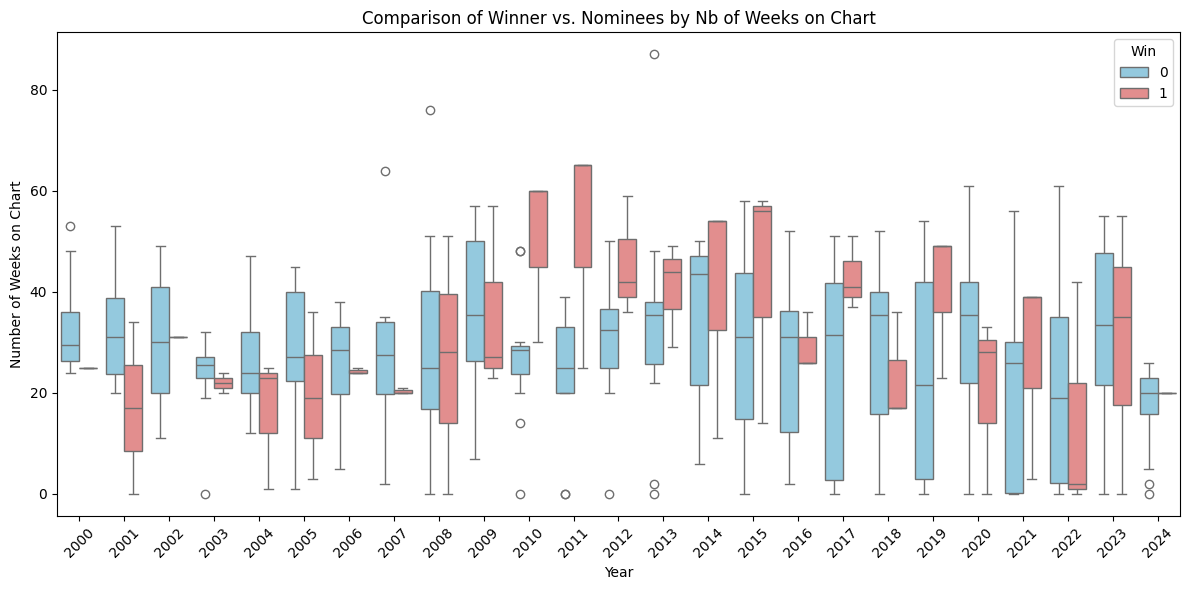

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

winner_vs_nominees = []

for year in grammys_df['Year'].unique():
    for category in grammys_df['Category'].unique():
        # Get the winner and 5 nominees for the year and category
        category_data = grammys_df[(grammys_df['Year'] == year) & (grammys_df['Category'] == category)]

        # Identify the winner and the nominees (assuming 1 winner and 5 nominees per category)
        winner = category_data[category_data['Win'] == 1]
        nominees = category_data[category_data['Win'] == 0]

        if len(nominees) >= 3:  # Ensure there are at least 5 nominees
            # Combine winner and nominees into one dataframe for easy comparison
            winner_vs_nominees.append(pd.concat([winner, nominees.head(len(nominees))]))

# Concatenate all the data from different years and categories into one DataFrame
comparison_df = pd.concat(winner_vs_nominees)

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=comparison_df, x="Year", y="Nb of Weeks on Chart", hue="Win", palette={1: "lightcoral", 0: "skyblue"})
plt.title("Comparison of Winner vs. Nominees by Nb of Weeks on Chart")
plt.xlabel("Year")
plt.ylabel("Number of Weeks on Chart")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


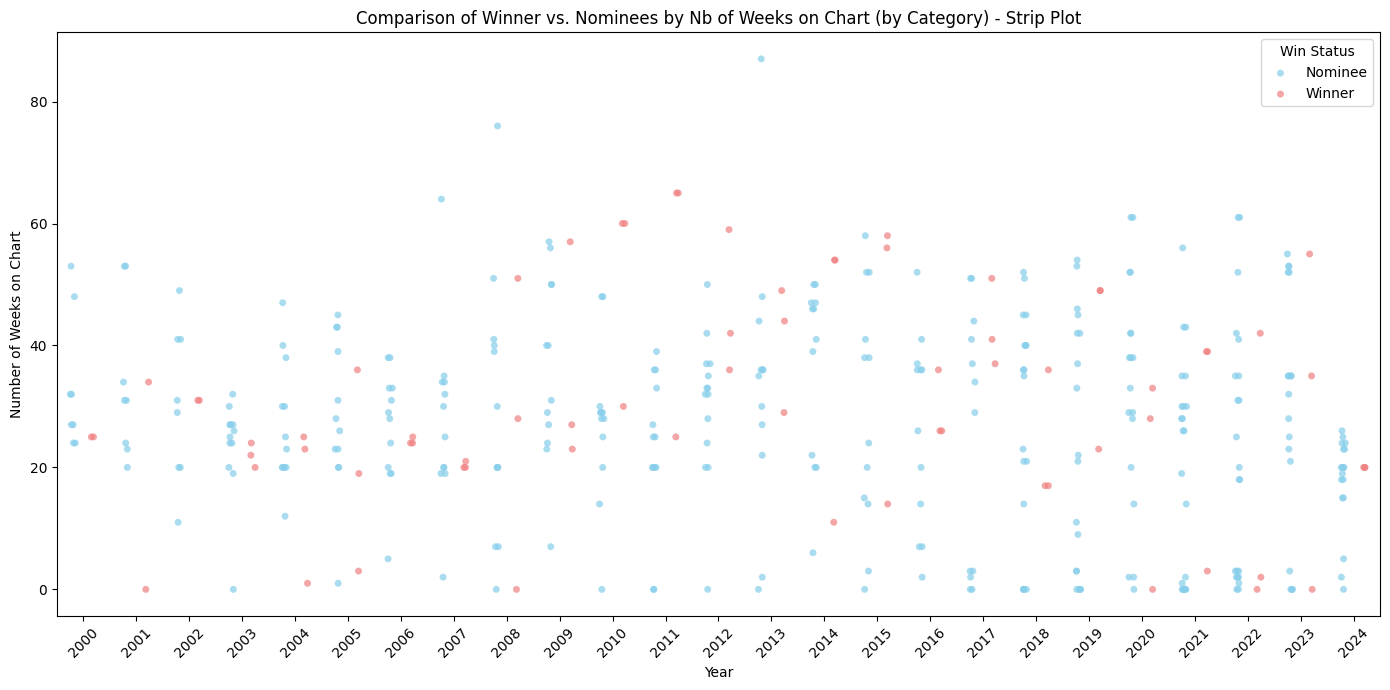

In [ ]:
# Strip Plot
plt.figure(figsize=(14, 7))
sns.stripplot(data=comparison_df, x="Year", y="Nb of Weeks on Chart", hue="Win", palette={1: "lightcoral", 0: "skyblue"}, jitter=True, dodge=True, marker='o', alpha=0.7)
plt.title("Comparison of Winner vs. Nominees by Nb of Weeks on Chart (by Category) - Strip Plot")
plt.xlabel("Year")
plt.ylabel("Number of Weeks on Chart")
plt.xticks(rotation=45)
plt.legend(title="Win Status", loc='upper right', labels=["Nominee", "Winner"])
plt.tight_layout()
plt.show()


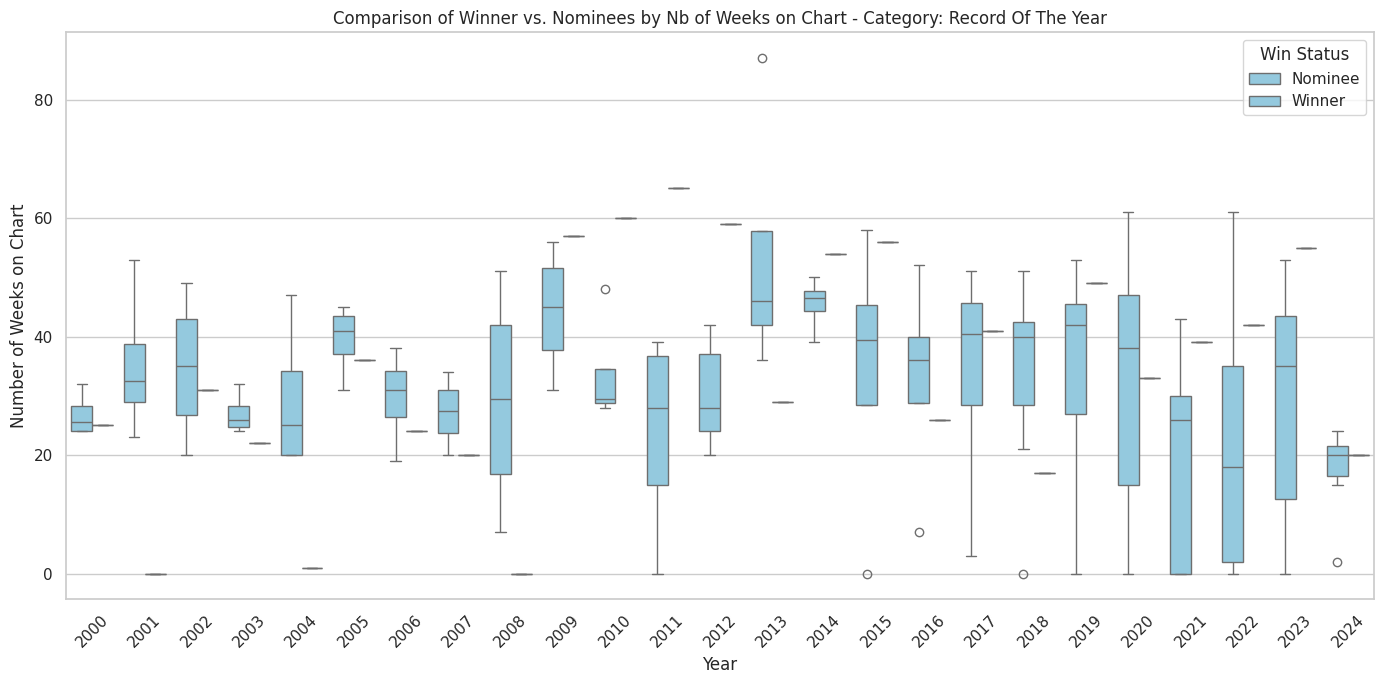

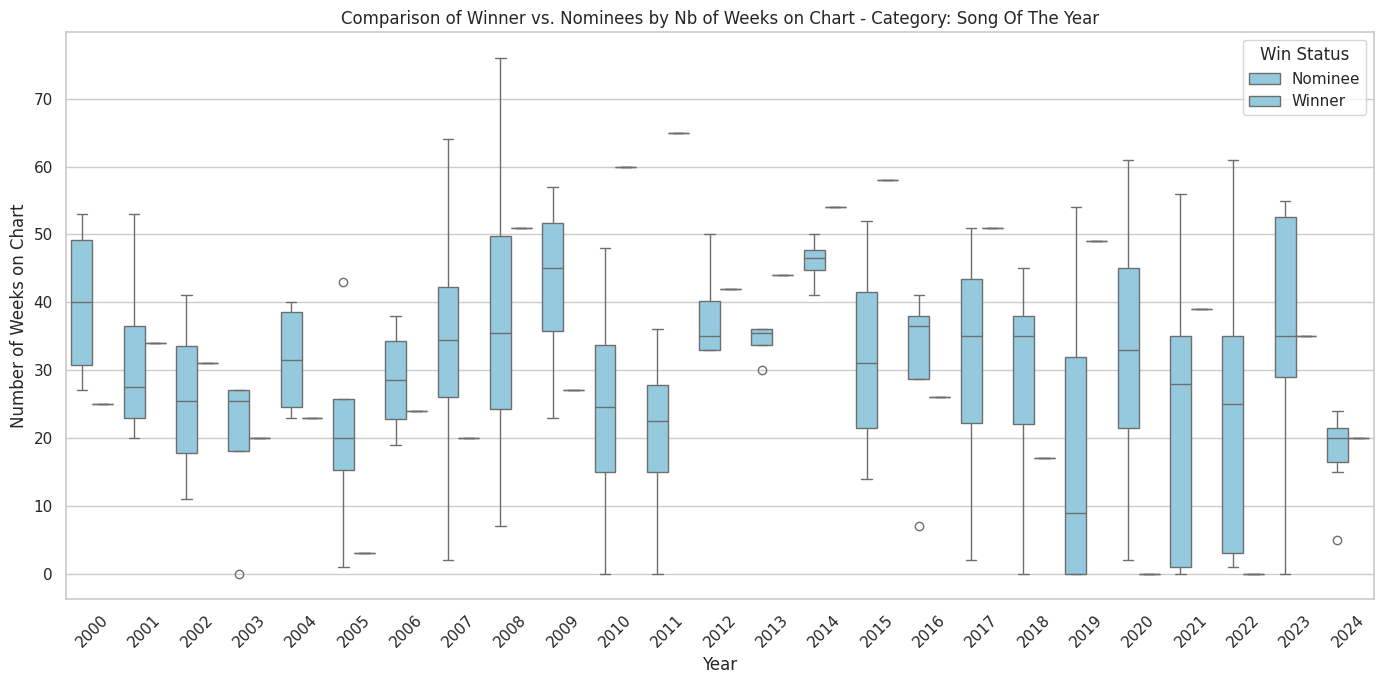

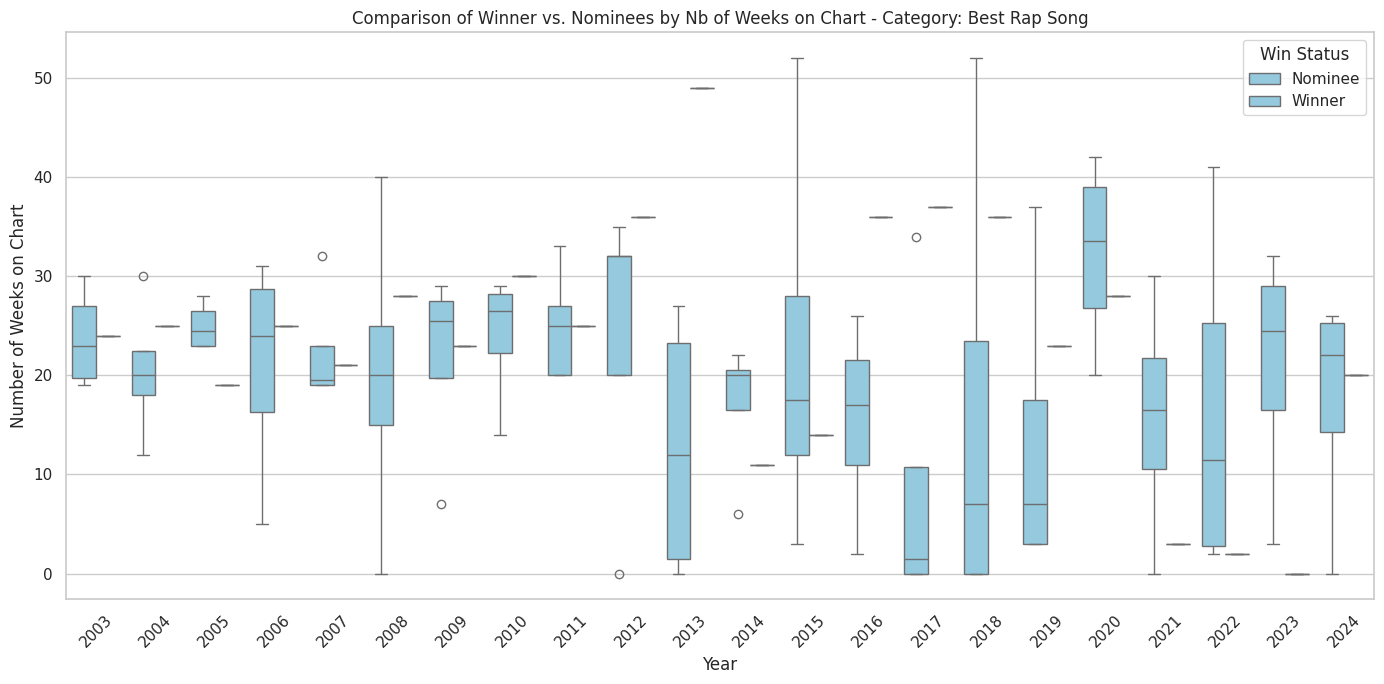

In [ ]:


sns.set(style="whitegrid")

# Get unique categories
categories = comparison_df['Category'].unique()

# Plotting 1 plot per category
for category in categories:
    # Filter the data for the specific category
    cat_data = comparison_df[comparison_df['Category'] == category]

    # Create a box plot for the specific category
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=cat_data, x="Year", y="Nb of Weeks on Chart",
                hue="Win",
                palette={1: "lightcoral", 0: "skyblue"},
                hue_order=[0, 1])  # Ensure 0 (Non-Winner) is first, 1 (Winner) second

    # Add the title and labels
    plt.title(f"Comparison of Winner vs. Nominees by Nb of Weeks on Chart - Category: {category}")
    plt.xlabel("Year")
    plt.ylabel("Number of Weeks on Chart")
    plt.xticks(rotation=45)

    # Customize the legend
    plt.legend(title="Win Status", loc='upper right', labels=["Nominee", "Winner"])

    # Adjust layout to ensure everything fits
    plt.tight_layout()

    # Show the plot
    plt.show()


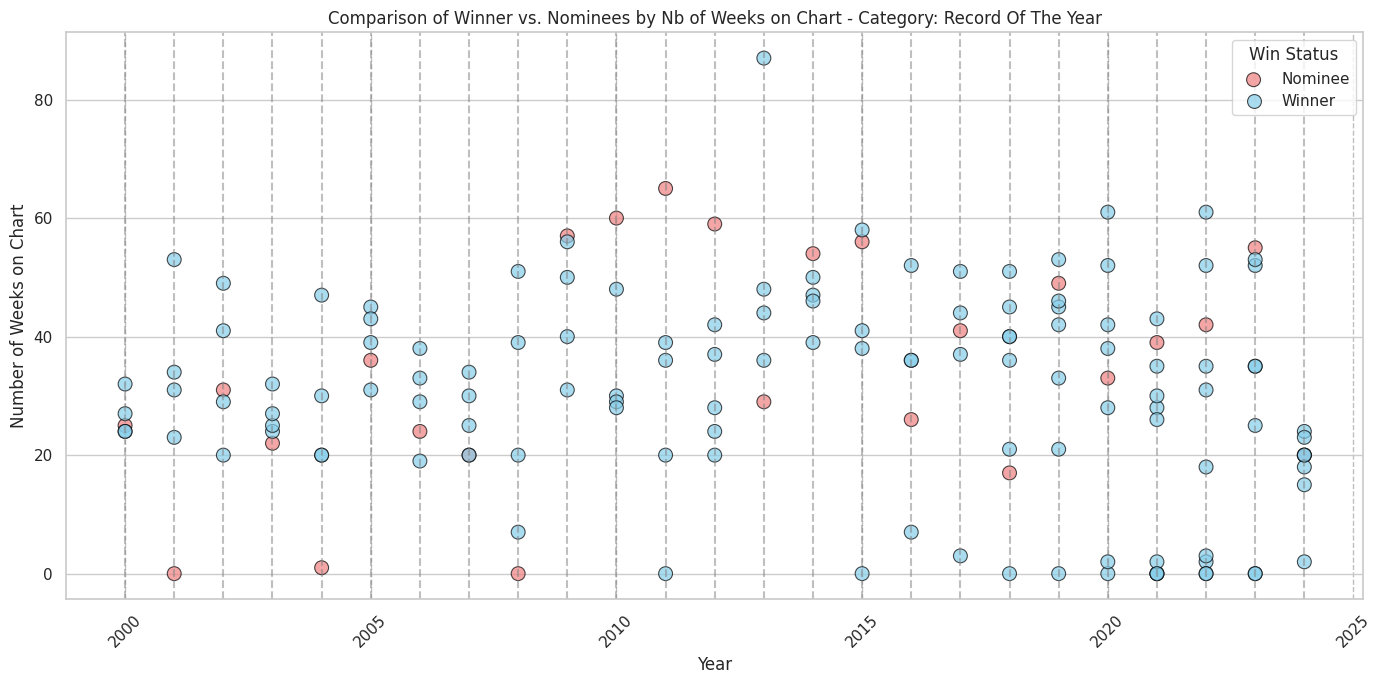

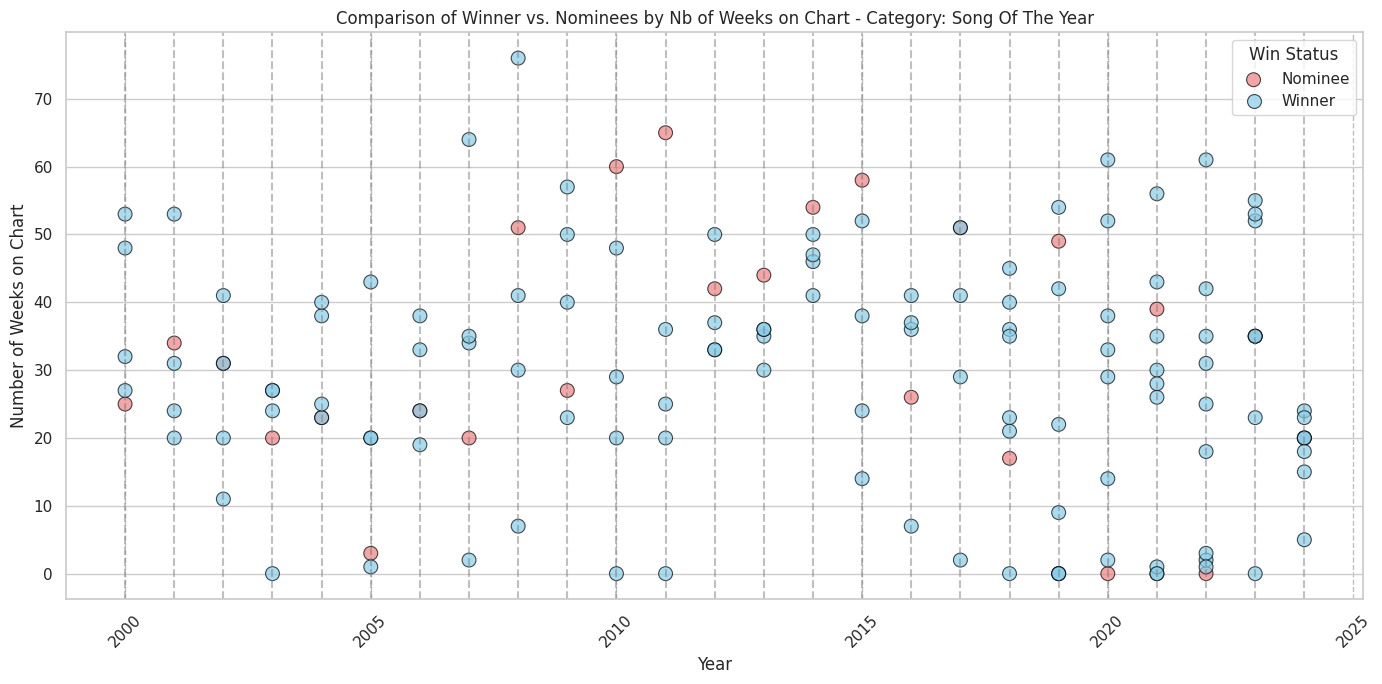

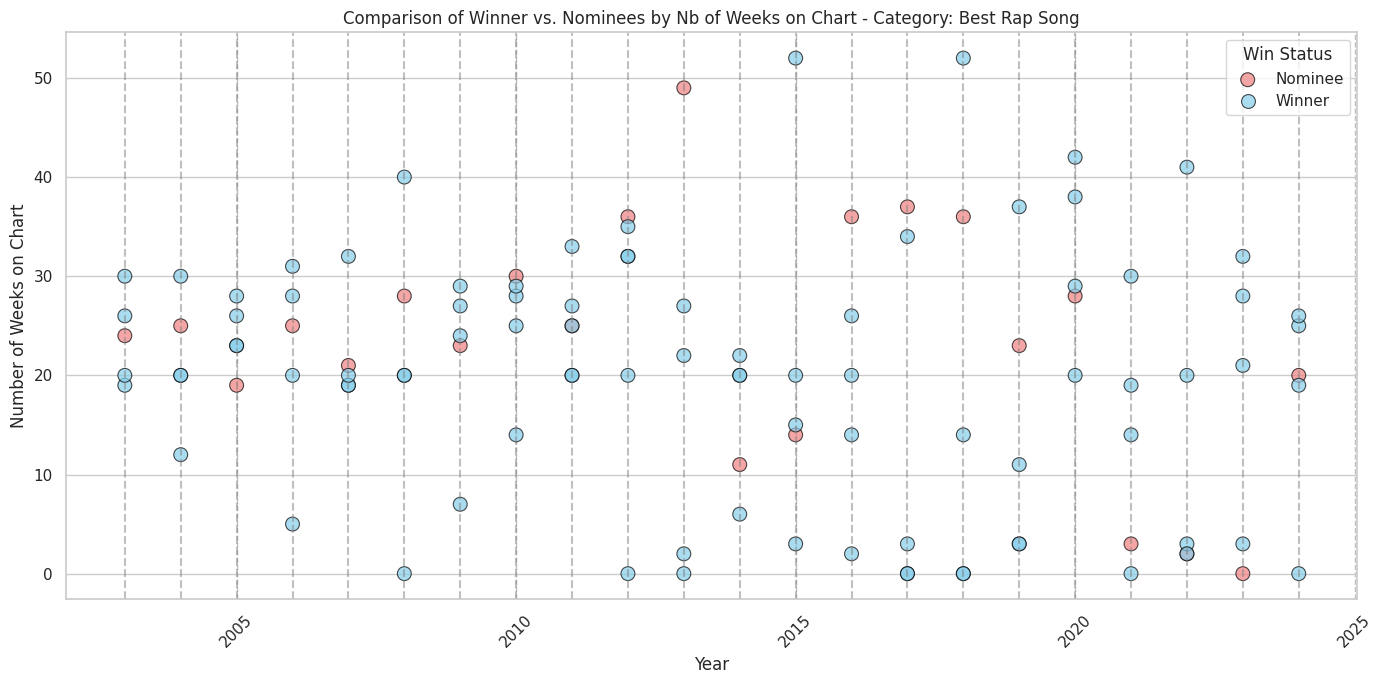

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'comparison_df' is already defined
# comparison_df = ...

# Set the seaborn style
sns.set(style="whitegrid")

# Get unique categories
categories = comparison_df['Category'].unique()

# Plotting 1 plot per category
for category in categories:
    # Filter the data for the specific category
    cat_data = comparison_df[comparison_df['Category'] == category]

    # Create a scatter plot for the specific category
    plt.figure(figsize=(14, 7))

    # Scatter plot with custom colors based on 'Win' column
    sns.scatterplot(data=cat_data, x="Year", y="Nb of Weeks on Chart",
                    hue="Win", palette={1: "lightcoral", 0: "skyblue"},
                    hue_order=[0, 1], s=100, edgecolor='black', alpha=0.7)

    # Add vertical gridlines to separate years
    plt.grid(axis='x', linestyle='--', color='gray', alpha=0.5)

    # Add vertical lines to separate years
    years = cat_data['Year'].unique()
    for year in years:
        plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

    # Add the title and labels
    plt.title(f"Comparison of Winner vs. Nominees by Nb of Weeks on Chart - Category: {category}")
    plt.xlabel("Year")
    plt.ylabel("Number of Weeks on Chart")
    plt.xticks(rotation=45)

    # Customize the legend
    plt.legend(title="Win Status", loc='upper right', labels=["Nominee", "Winner"])

    # Adjust layout to ensure everything fits
    plt.tight_layout()

    # Show the plot
    plt.show()


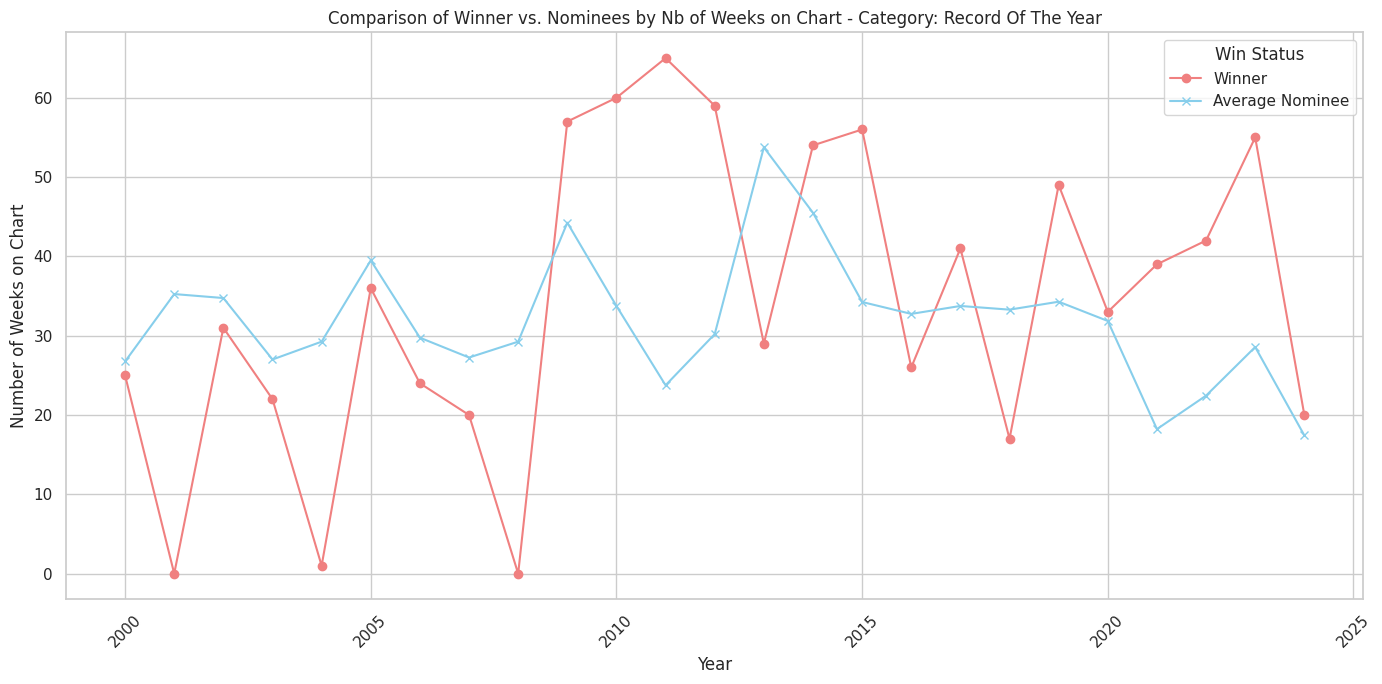

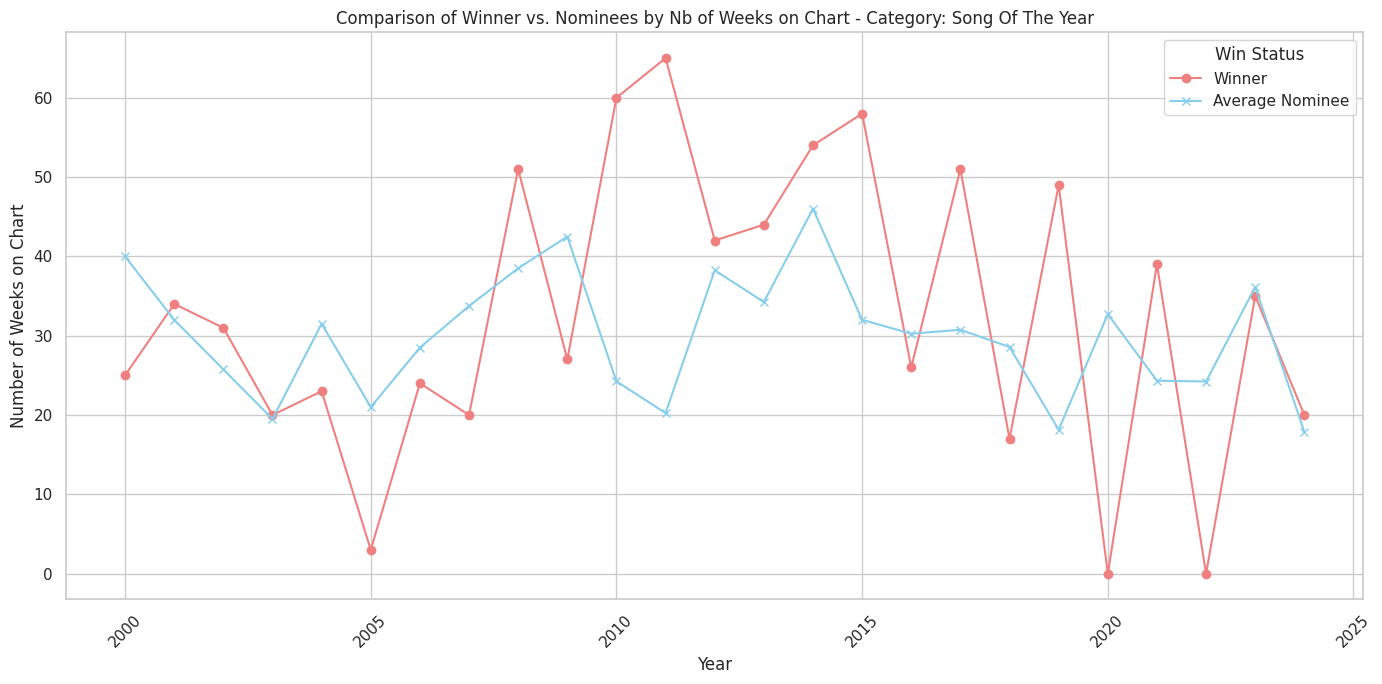

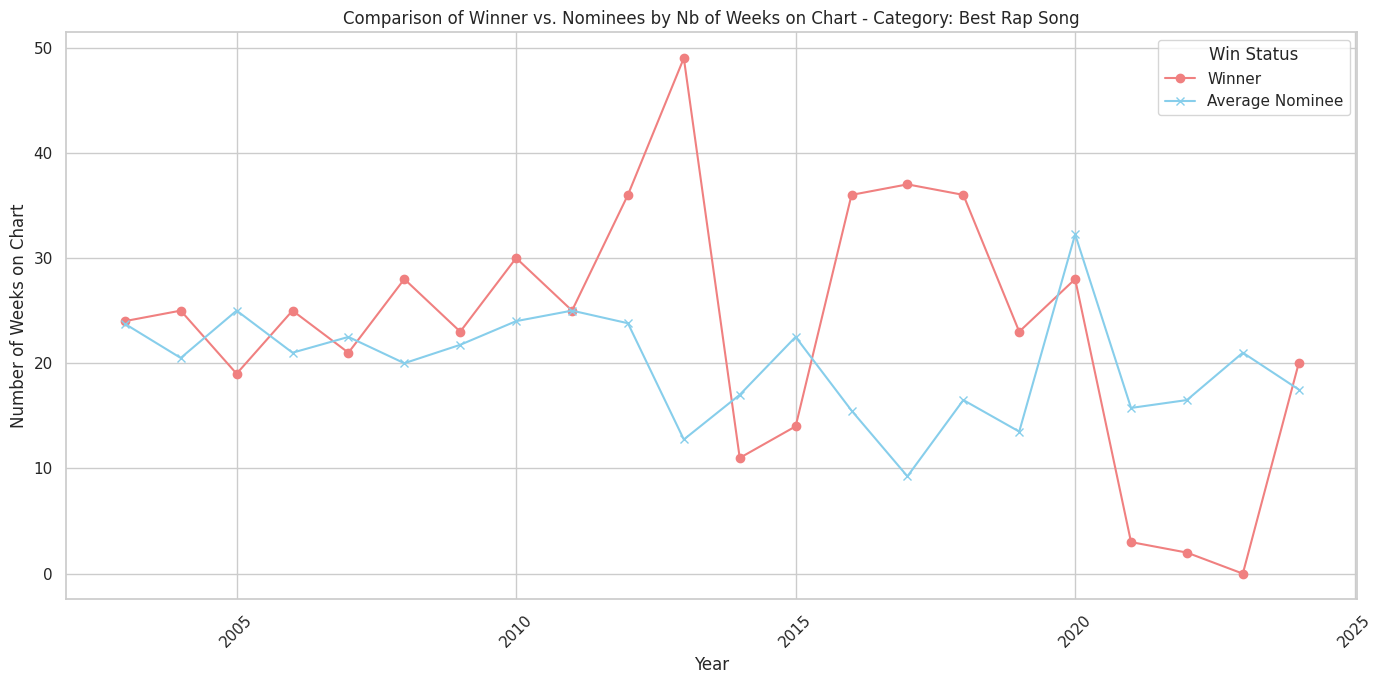

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the preferred colors
win_color = "lightcoral"
nominee_color = "skyblue"

# Get unique categories
categories = comparison_df['Category'].unique()

# Plotting 1 plot per category
for category in categories:
    # Filter the data for the specific category
    cat_data = comparison_df[comparison_df['Category'] == category]

    # Calculate the average of nominees for each year
    avg_nominee = cat_data[cat_data['Win'] == 0].groupby('Year')['Nb of Weeks on Chart'].mean()

    # Plotting for the category
    plt.figure(figsize=(14, 7))

    # Plot the winner's line
    winner_data = cat_data[cat_data['Win'] == 1]
    plt.plot(winner_data['Year'], winner_data['Nb of Weeks on Chart'], marker='o', color=win_color, label='Winner')

    # Plot the average line for nominees
    plt.plot(avg_nominee.index, avg_nominee.values, marker='x', color=nominee_color, label='Average Nominee')

    # Set plot labels and title
    plt.title(f"Comparison of Winner vs. Nominees by Nb of Weeks on Chart - Category: {category}")
    plt.xlabel("Year")
    plt.ylabel("Number of Weeks on Chart")
    plt.legend(title="Win Status", loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()


# Analysis of debut rank


In [ ]:
import plotly.express as px

fig = px.scatter(
    songs_charts_df,
    y="Debut Week",
    x="Debut Rank",# Group by artist, aligns songs from same artist
    color="Status",
    color_discrete_map={
        "Winner": "lightcoral",
        "Nominated (Non-Winner)": "skyblue",
        "Non-Nominated": "lightgrey"
    },
    hover_data=["Title", "Main Artist", "Release Date", 'ArtistID', 'Song ID'],
    title="Debut Rank vs Grammy Recognition",
    height=800
)

# Hide y-axis labels (Artist ID) to avoid clutter
fig.update_layout(
    yaxis=dict(title="", showticklabels=False),
    xaxis_title="Debut Rank"
)

fig.show()



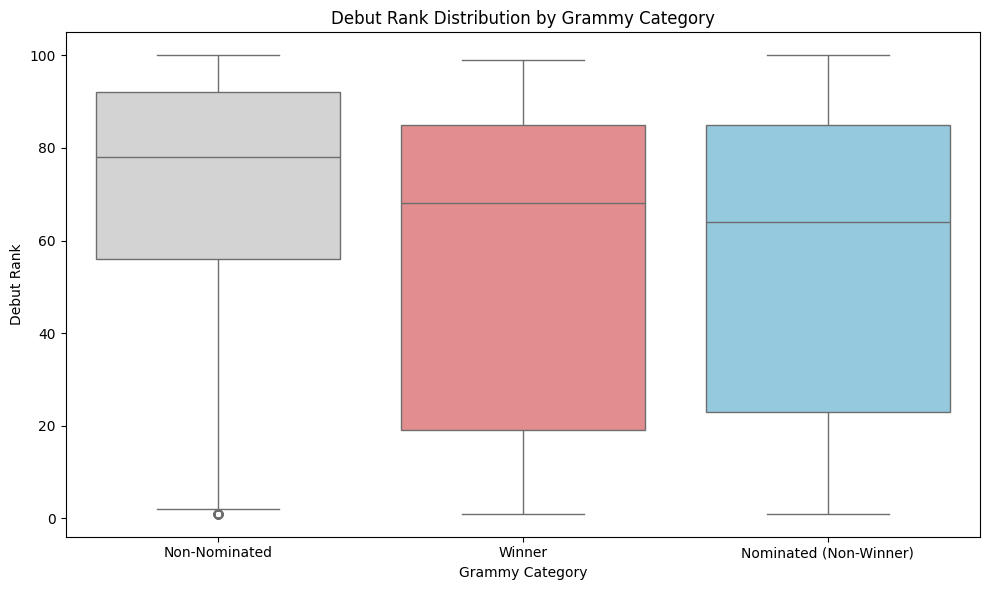

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=songs_charts_df,
    x="Status",
    y="Debut Rank", hue='Status',
    palette={
        "Winner": "lightcoral",
        "Nominated (Non-Winner)": "skyblue",
        "Non-Nominated": "lightgrey"
    }
)


plt.xlabel("Grammy Category")
plt.ylabel("Debut Rank")
plt.title("Debut Rank Distribution by Grammy Category")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Ensure no NaNs in "Debut Rank"
group1 = songs_charts_df[songs_charts_df["Is Nominated"] == "Nominated"]["Debut Rank"].dropna()
group2 = songs_charts_df[songs_charts_df["Is Nominated"] == "Not Nominated"]["Debut Rank"].dropna()

stat, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U test BETWEEN NOMINATED VS NON NOMINATED -> Debut Rank ", stat, " p-value:", p_value)

group1 = songs_charts_df[songs_charts_df["Status"] == "Winner"]["Debut Rank"].dropna()
group2 = songs_charts_df[songs_charts_df["Status"] == "Nominated (Non-Winner)"]["Debut Rank"].dropna()

stat, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U test BETWEEN NOMINATED AND WINNER -> Debut Rank", stat, " p-value:", p_value)


Mann-Whitney U test BETWEEN NOMINATED VS NON NOMINATED -> Debut Rank  1135239.0  p-value: 4.077272281018746e-15
Mann-Whitney U test BETWEEN NOMINATED AND WINNER -> Debut Rank 6038.0  p-value: 0.9162047600929111


# Charting vs season

In [ ]:
songs_charts_df.iloc[11157, songs_charts_df.columns.get_loc("Release Date")] = pd.to_datetime("2025-04-05") #fixed a typo with dates here


In [ ]:
# Ensure release date is datetime
songs_charts_df["Release Date"] = pd.to_datetime(songs_charts_df["Release Date"])

# Extract month and year
songs_charts_df["Release Month"] = songs_charts_df["Release Date"].dt.month_name()
songs_charts_df

Song ID                         Title                 Cleaned Title  \
0           S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1           S1               The First Night               The First Night   
2           S2                         Crush                         Crush   
3           S3                        My Way                        My Way   
4           S4               The Boy Is Mine               The Boy Is Mine   
...        ...                           ...                           ...   
11484  S135833        Please Read The Letter        Please Read The Letter   
11485  S135834               Sexual Eruption               Sexual Eruption   
11486  S135835              Here We Go Again              Here We Go Again   
11487  S135836         Keep Me In Your Heart         Keep Me In Your Heart   
11488  S135837                       Walk On                       Walk On   

                             Artist     Main Artist           Feat  \
0                         Aerosmith       Aerosmith            NaN   
1                            Monica          Monica            NaN   
2                    Jennifer Paige  Jennifer Paige            NaN   
3                             Usher           Usher            NaN   
4                   Brandy & Monica          Brandy         Monica   
...                             ...             ...            ...   
11484  Robert Plant & Alison Krauss    Robert Plant  Alison Krauss   
11485                    Snoop Dogg      Snoop Dogg            NaN   
11486     Ray Charles & Norah Jones     Ray Charles    Norah Jones   
11487                  Warren Zevon    Warren Zevon            NaN   
11488                            U2              U2            NaN   

                                    Song Writers/Credits  \
0                                             D.E.Warren   
1        J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2             A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3           J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4      R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
...                                                  ...   
11484                                                NaN   
11485                                                NaN   
11486                                                NaN   
11487                                                NaN   
11488                                                NaN   

                          Producer           Label  \
0                       M.Serletic        Columbia   
1                          J.Dupri          Arista   
2           A.Goldmark, J.Bralower  edel/Hollywood   
3                          J.Dupri   LaFace/Arista   
4      R.Jerkins, D.Austin, Brandy        Atlantic   
...                            ...             ...   
11484                          NaN             NaN   
11485                          NaN             NaN   
11486                          NaN             NaN   
11487                          NaN             NaN   
11488                          NaN             NaN   

                                 Album  ...  ArtistID Nb of Weeks on Chart  \
0      I Don't Want To Miss A Thing EP  ...        A0                 17.0   
1                      The Boy Is Mine  ...        A1                 17.0   
2                       Jennifer Paige  ...        A2                 13.0   
3                               My Way  ...        A3                 10.0   
4              the boy is mine (Remix)  ...        A4                 10.0   
...                                ...  ...       ...                  ...   
11484                     Raising Sand  ...     A2293                  0.0   
11485                     Ego Trippin'  ...       A17                  0.0   
11486             Genius Loves Company  ...     A2297                  0.0   
11487                         The Wind  ...     A2298                  0.0   
1

In [ ]:
# Filter out rows with missing Release Month if any
filtered_df = songs_charts_df.dropna(subset=["Release Month", "Status"])

# Get monthly counts per category
counts = filtered_df.groupby(["Status", "Release Month"]).size().reset_index(name="count")

# Get totals per category (based on the same filtered data!)
totals = filtered_df.groupby("Status").size().reset_index(name="total")

# Merge and calculate percentages
df_percent = pd.merge(counts, totals, on="Status")
df_percent["percentage"] = df_percent["count"] / df_percent["total"] * 100

# Optional: validate sums
print(df_percent.groupby("Status")["count"].sum())  # Should match totals

# Ensure calendar order for months
month_order = pd.date_range("1998-01-01", periods=12, freq="ME").strftime("%B")
df_percent["Release Month"] = pd.Categorical(df_percent["Release Month"], categories=month_order, ordered=True)
df_percent = df_percent.sort_values("Release Month")


Status
Nominated (Non-Winner)      246
Non-Nominated             10559
Winner                       57
Name: count, dtype: int64


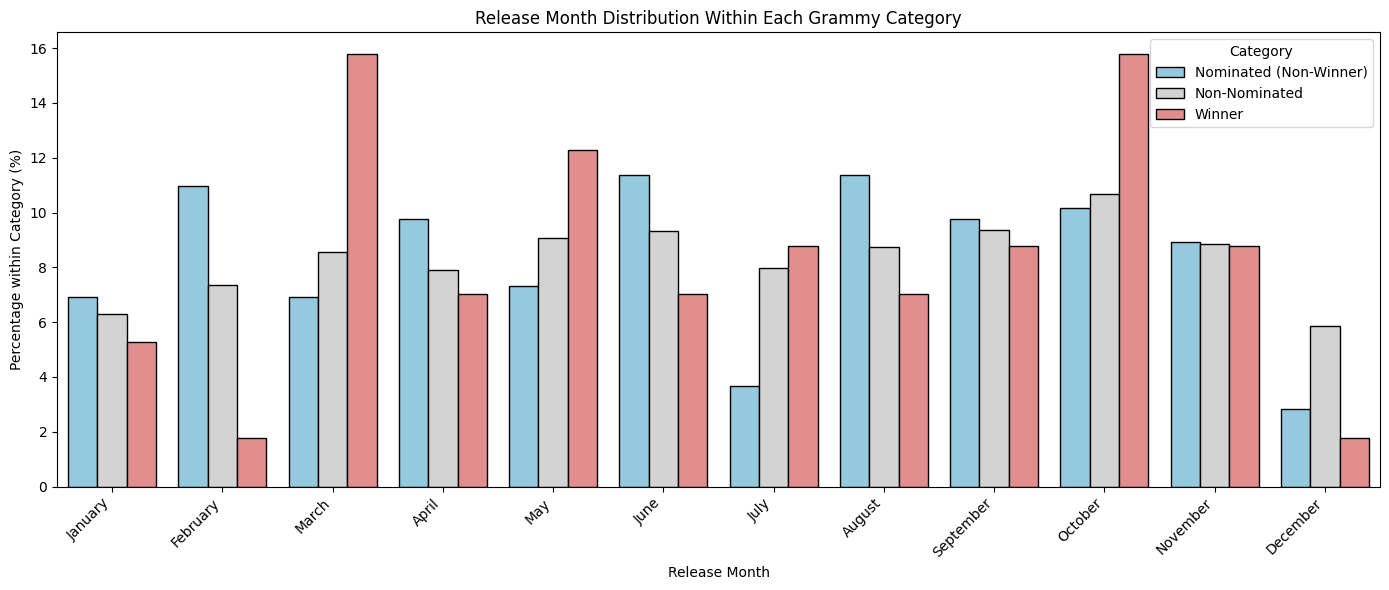

In [ ]:
# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_percent,
    x="Release Month",
    y="percentage",
    hue="Status",
    palette=status_palette,
    edgecolor="black"
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Release Month")
plt.ylabel("Percentage within Category (%)")
plt.title("Release Month Distribution Within Each Grammy Category")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


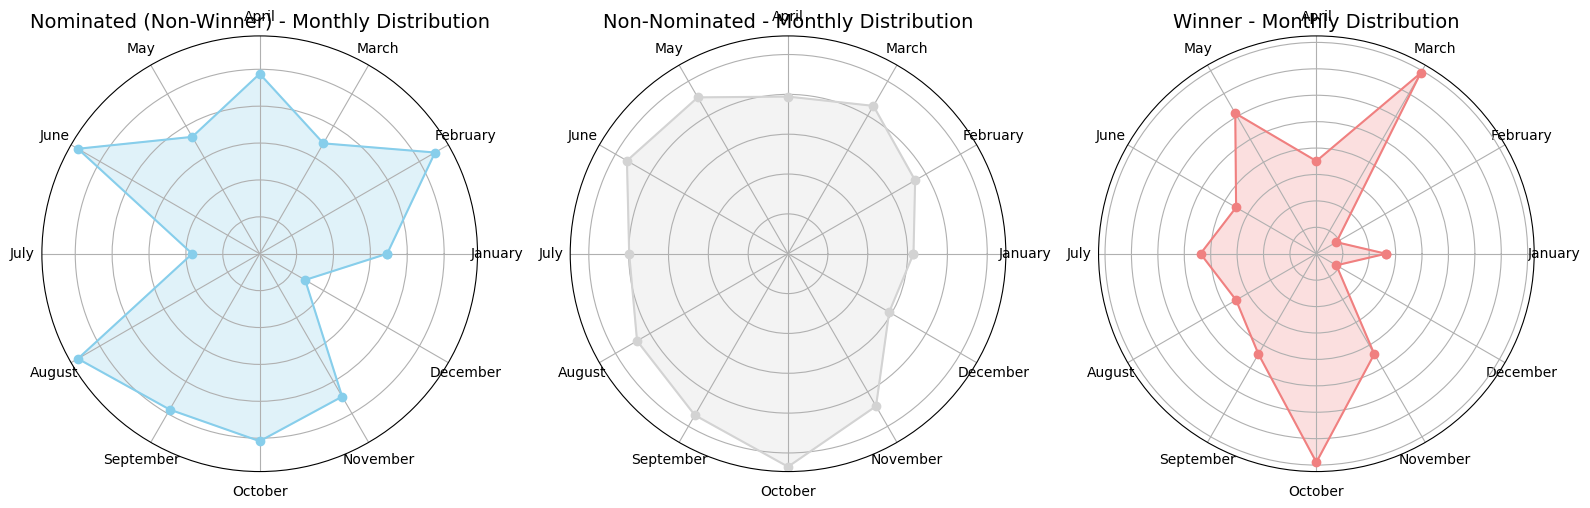

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore only specific user warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*SettingWithCopyWarning.*")

categories = df_percent['Status'].unique()

# Initialize the subplot grid
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6), subplot_kw={'projection': 'polar'})

# Handle case where there's only one category
if len(categories) == 1:
    axes = [axes]

# Create plots
for ax, category in zip(axes, categories):
    cat_data = df_percent[df_percent['Status'] == category].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Convert month to index
    cat_data.loc[:, "month_num"] = cat_data["Release Month"].apply(lambda m: month_order.tolist().index(m))

    # Sort and reindex months
    cat_data = cat_data.sort_values("month_num")
    values = cat_data.set_index("month_num").reindex(range(12))["percentage"].fillna(0).tolist()

    # Prepare angles
    angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    # Plot
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(month_order)
    ax.plot(angles, values, label=category, marker='o', color=status_palette[category])
    ax.fill(angles, values, alpha=0.25, color=status_palette[category])
    ax.set_title(f"{category} - Monthly Distribution", fontsize=14)
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()


In [ ]:
df_percent

Status Release Month  count  total  percentage
4   Nominated (Non-Winner)       January     17    246    6.910569
16           Non-Nominated       January    665  10559    6.297945
28                  Winner       January      3     57    5.263158
3   Nominated (Non-Winner)      February     27    246   10.975610
15           Non-Nominated      February    778  10559    7.368122
27                  Winner      February      1     57    1.754386
31                  Winner         March      9     57   15.789474
7   Nominated (Non-Winner)         March     17    246    6.910569
19           Non-Nominated         March    905  10559    8.570887
0   Nominated (Non-Winner)         April     24    246    9.756098
12           Non-Nominated         April    833  10559    7.889005
24                  Winner         April      4     57    7.017544
32                  Winner           May      7     57   12.280702
8   Nominated (Non-Winner)           May     18    246    7.317073
20           Non-Nominated           May    957  10559    9.063358
18           Non-Nominated          June    986  10559    9.338005
30                  Winner          June      4     57    7.017544
6   Nominated (Non-Winner)          June     28    246   11.382114
29                  Winner          July      5     57    8.771930
17           Non-Nominated          July    842  10559    7.974240
5   Nominated (Non-Winner)          July      9    246    3.658537
13           Non-Nominated        August    924  10559    8.750829
25                  Winner        August      4     57    7.017544
1   Nominated (Non-Winner)        August     28    246   11.382114
23           Non-Nominated     September    988  10559    9.356947
11  Nominated (Non-Winner)     September     24    246    9.756098
35                  Winner     September      5     57    8.771930
22           Non-Nominated       October   1129  10559   10.692300
10  Nominated (Non-Winner)       October     25    246   10.162602
34                  Winner       October      9     57   15.789474
21           Non-Nominated      November    933  10559    8.836064
9   Nominated (Non-Winner)      November     22    246    8.943089
33                  Winner      November      5     57    8.771930
14           Non-Nominated      December    619  10559    5.862298
26                  Winner      December      1     57    1.754386
2   Nominated (Non-Winner)      December      7    246    2.845528

In [ ]:
category_counts = df_percent.groupby("Status")["count"].sum()
print(category_counts)

Status
Nominated (Non-Winner)      246
Non-Nominated             10559
Winner                       57
Name: count, dtype: int64


In [ ]:
# Group "Winner" and "Nominated (Non-Winner)" into one category
df_percent_calculated = df_percent.copy()
df_percent_calculated["Grouped Category"] = df_percent_calculated["Status"].apply(lambda x: "Nominated or Winner" if x in ["Winner", "Nominated (Non-Winner)"] else "Non-Nominated")

# Now, group by "Grouped Category" and "Release Month"
grouped_df = df_percent_calculated.groupby(["Grouped Category", "Release Month"]).agg(
    count=('count', 'sum'),
    total=('total', 'sum')
).reset_index()

# Calculate the new percentage for each group
grouped_df["percentage"] = (grouped_df["count"] / grouped_df["total"]) * 100

# View the grouped DataFrame with recalculated percentages
grouped_df


<ipython-input-150-8f4ff5b0e4b2>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Grouped Category Release Month  count  total  percentage
0   Nominated or Winner       January     20    303    6.600660
1   Nominated or Winner      February     28    303    9.240924
2   Nominated or Winner         March     26    303    8.580858
3   Nominated or Winner         April     28    303    9.240924
4   Nominated or Winner           May     25    303    8.250825
5   Nominated or Winner          June     32    303   10.561056
6   Nominated or Winner          July     14    303    4.620462
7   Nominated or Winner        August     32    303   10.561056
8   Nominated or Winner     September     29    303    9.570957
9   Nominated or Winner       October     34    303   11.221122
10  Nominated or Winner      November     27    303    8.910891
11  Nominated or Winner      December      8    303    2.640264
12        Non-Nominated       January    665  10559    6.297945
13        Non-Nominated      February    778  10559    7.368122
14        Non-Nominated         March    905  10559    8.570887
15        Non-Nominated         April    833  10559    7.889005
16        Non-Nominated           May    957  10559    9.063358
17        Non-Nominated          June    986  10559    9.338005
18        Non-Nominated          July    842  10559    7.974240
19        Non-Nominated        August    924  10559    8.750829
20        Non-Nominated     September    988  10559    9.356947
21        Non-Nominated       October   1129  10559   10.692300
22        Non-Nominated      November    933  10559    8.836064
23        Non-Nominated      December    619  10559    5.862298

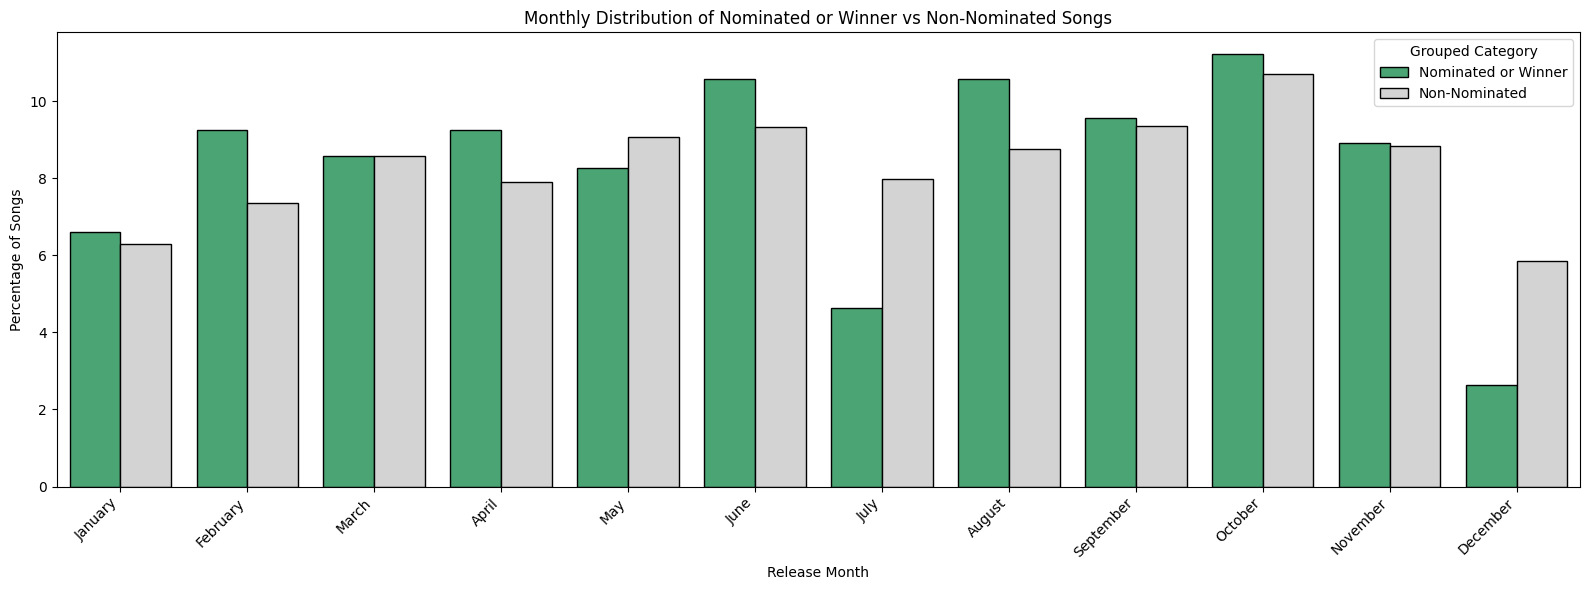

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the data using seaborn's countplot
sns.barplot(
    data=grouped_df,
    x="Release Month",
    y="percentage",
    hue="Grouped Category",  # Grouping by 'Nominated or Winner' vs 'Non-Nominated'
    palette={"Nominated or Winner": "mediumseagreen", "Non-Nominated": "lightgrey"},
    edgecolor="black"
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel("Release Month")
plt.ylabel("Percentage of Songs")
plt.title("Monthly Distribution of Nominated or Winner vs Non-Nominated Songs")

# Display the plot
plt.tight_layout()
plt.show()


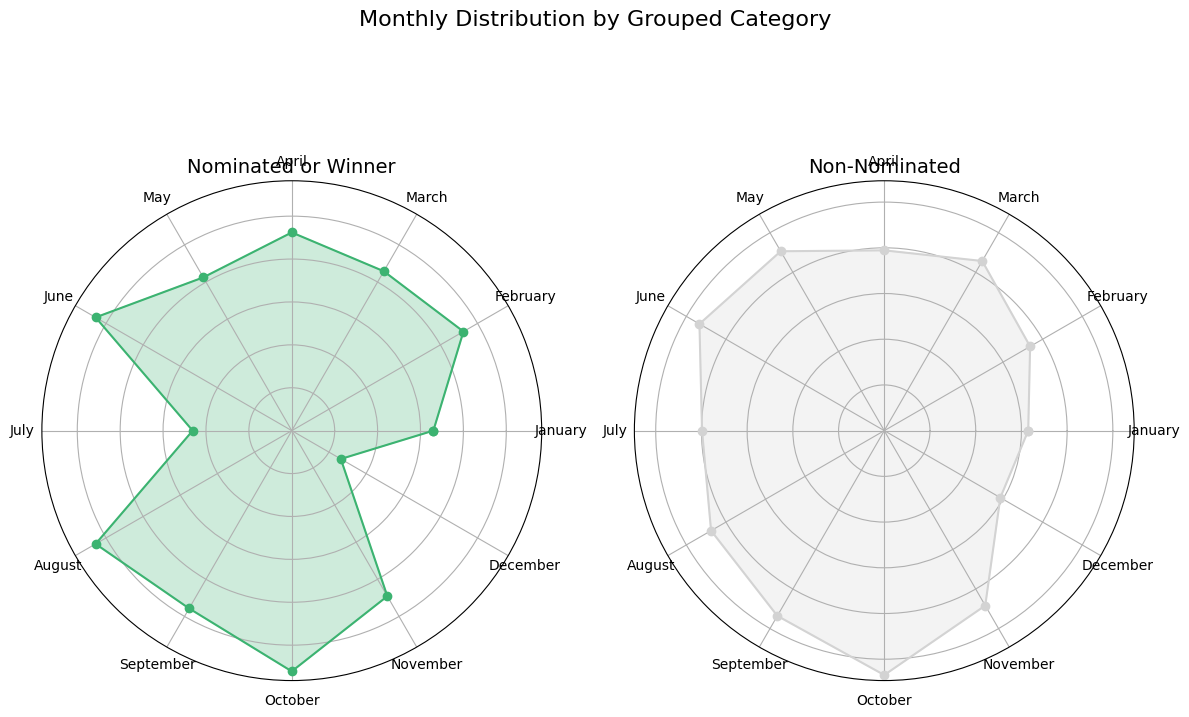

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Use existing month order
month_order = pd.date_range("1998-01-01", periods=12, freq="ME").strftime("%B")

# Map month names to numerical indices based on month_order
grouped_df["month_num"] = grouped_df["Release Month"].apply(lambda m: month_order.tolist().index(m))
grouped_df = grouped_df.sort_values("month_num")

# Set up figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': 'polar'})

# Define colors
color_map = {
    "Nominated or Winner": "mediumseagreen",
    "Non-Nominated": "lightgrey"
}

# Plot each category in its own subplot
for ax, category in zip(axes, color_map.keys()):
    cat_data = grouped_df[grouped_df["Grouped Category"] == category]
    values = cat_data.set_index("month_num").reindex(range(12))["percentage"].fillna(0).tolist()
    angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()

    # Close the circle
    values += values[:1]
    angles += angles[:1]

    ax.plot(angles, values, label=category, marker='o', color=color_map[category])
    ax.fill(angles, values, alpha=0.25, color=color_map[category])

    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(month_order)
    ax.set_yticklabels([])
    ax.set_title(f"{category}", fontsize=14)

# Layout adjustment
plt.suptitle("Monthly Distribution by Grouped Category", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
grouped_df

Grouped Category Release Month  count  total  percentage month_num
0   Nominated or Winner       January     20    302    6.622517         0
12        Non-Nominated       January    665  10560    6.297348         0
1   Nominated or Winner      February     28    302    9.271523         1
13        Non-Nominated      February    778  10560    7.367424         1
2   Nominated or Winner         March     26    302    8.609272         2
14        Non-Nominated         March    905  10560    8.570076         2
3   Nominated or Winner         April     27    302    8.940397         3
15        Non-Nominated         April    834  10560    7.897727         3
4   Nominated or Winner           May     25    302    8.278146         4
16        Non-Nominated           May    957  10560    9.062500         4
17        Non-Nominated          June    986  10560    9.337121         5
5   Nominated or Winner          June     32    302   10.596026         5
18        Non-Nominated          July    842  10560    7.973485         6
6   Nominated or Winner          July     14    302    4.635762         6
19        Non-Nominated        August    924  10560    8.750000         7
7   Nominated or Winner        August     32    302   10.596026         7
20        Non-Nominated     September    988  10560    9.356061         8
8   Nominated or Winner     September     29    302    9.602649         8
21        Non-Nominated       October   1129  10560   10.691288         9
9   Nominated or Winner       October     34    302   11.258278         9
22        Non-Nominated      November    933  10560    8.835227        10
10  Nominated or Winner      November     27    302    8.940397        10
11  Nominated or Winner      December      8    302    2.649007        11
23        Non-Nominated      December    619  10560    5.861742        11

In [ ]:
category_counts = grouped_df.groupby("Grouped Category")["count"].sum()
print(category_counts)

Grouped Category
Nominated or Winner      303
Non-Nominated          10559
Name: count, dtype: int64


In [ ]:
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Create a copy and map seasons
df_percent_season = grouped_df.copy()
df_percent_season["Season"] = df_percent_season["Release Month"].map(month_to_season)

# Get correct total per Grouped Category (do not sum the 'total' column!)
category_totals = grouped_df.groupby("Grouped Category")["count"].sum().reset_index(name="true_total")

# Group by season and category, and sum counts
df_season_grouped = df_percent_season.groupby(["Grouped Category", "Season"])["count"].sum().reset_index()

# Merge with correct total
df_season_grouped = pd.merge(df_season_grouped, category_totals, on="Grouped Category")

# Calculate percentage
df_season_grouped["percentage"] = (df_season_grouped["count"] / df_season_grouped["true_total"]) * 100

# Order the seasons
season_order = ["Winter", "Spring", "Summer", "Autumn"]
df_season_grouped["Season"] = pd.Categorical(df_season_grouped["Season"], categories=season_order, ordered=True)
df_season_grouped = df_season_grouped.sort_values("Season")

# View final result
df_season_grouped


Grouped Category  Season  count  true_total  percentage
3  Nominated or Winner  Winter     56         303   18.481848
7        Non-Nominated  Winter   2062       10559   19.528364
1  Nominated or Winner  Spring     79         303   26.072607
5        Non-Nominated  Spring   2695       10559   25.523250
2  Nominated or Winner  Summer     78         303   25.742574
6        Non-Nominated  Summer   2752       10559   26.063074
0  Nominated or Winner  Autumn     90         303   29.702970
4        Non-Nominated  Autumn   3050       10559   28.885311

In [ ]:
category_counts = df_season_grouped.groupby("Grouped Category")["count"].sum()
print(category_counts)

Grouped Category
Nominated or Winner      303
Non-Nominated          10559
Name: count, dtype: int64


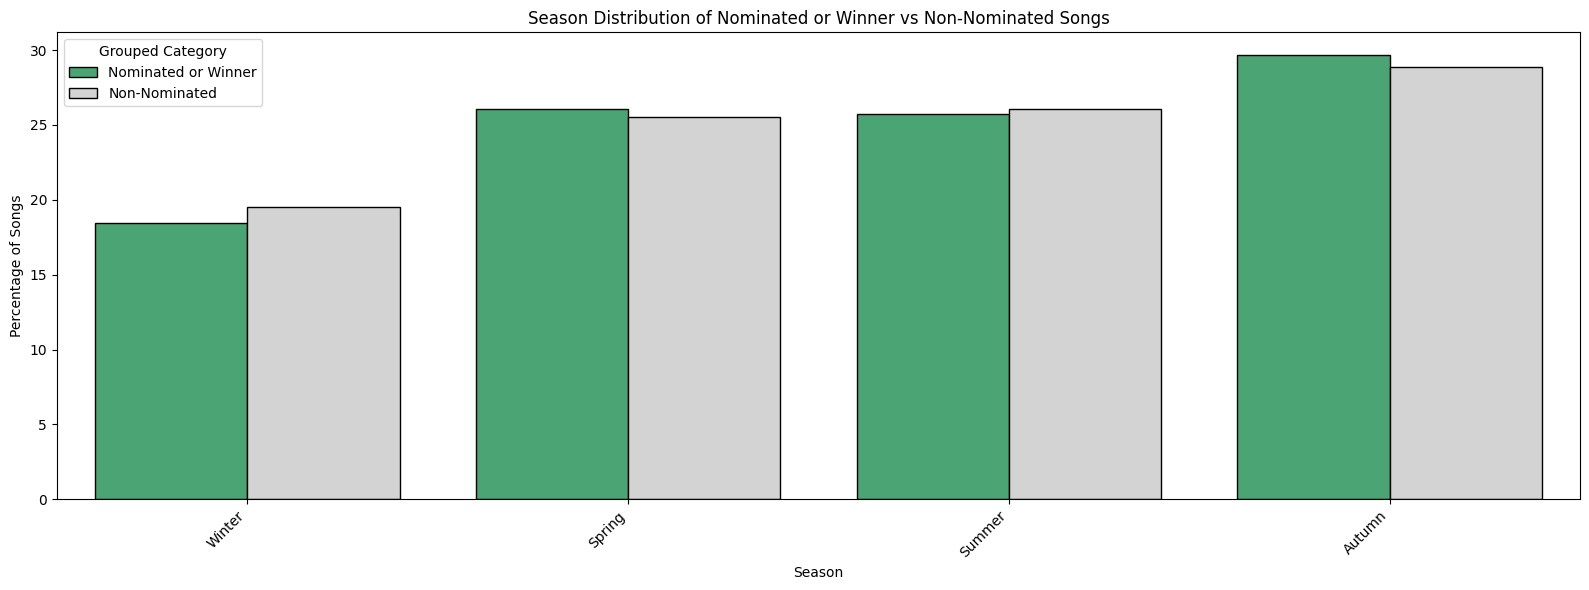

In [ ]:
plt.figure(figsize=(16, 6))

# Plot the data using seaborn's countplot
sns.barplot(
    data=df_season_grouped,
    x="Season",
    y="percentage",
    hue="Grouped Category",  # Grouping by 'Nominated or Winner' vs 'Non-Nominated'
    palette={"Nominated or Winner": "mediumseagreen", "Non-Nominated": "lightgrey"},
    edgecolor="black"
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Percentage of Songs")
plt.title("Season Distribution of Nominated or Winner vs Non-Nominated Songs")

# Display the plot
plt.tight_layout()
plt.show()

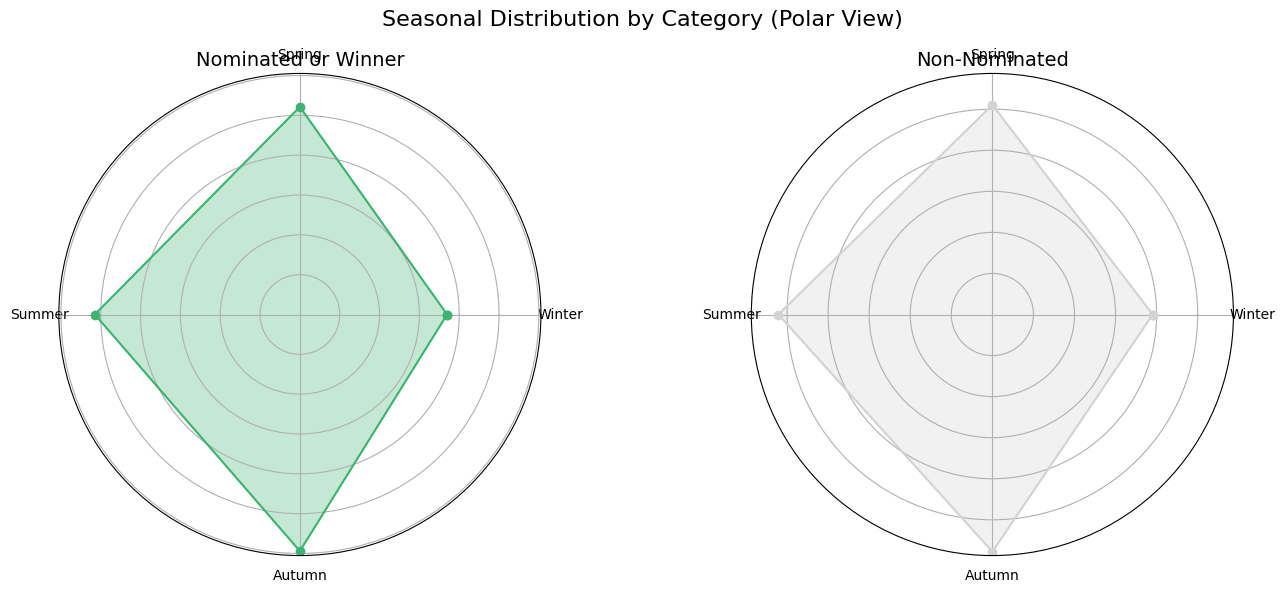

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique seasons in order
season_order = ["Winter", "Spring", "Summer", "Autumn"]
angles = np.linspace(0, 2 * np.pi, len(season_order), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': 'polar'})

# Loop over the two categories
for ax, category in zip(axes, df_season_grouped["Grouped Category"].unique()):
    # Filter data
    data = df_season_grouped[df_season_grouped["Grouped Category"] == category]
    data = data.set_index("Season").reindex(season_order).fillna(0)
    values = data["percentage"].tolist()
    values += values[:1]  # Close the circle

    # Plot
    ax.plot(angles, values, marker='o', label=category,
            color="mediumseagreen" if category == "Nominated or Winner" else "lightgrey")
    ax.fill(angles, values, alpha=0.3,
            color="mediumseagreen" if category == "Nominated or Winner" else "lightgrey")

    # Setup
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(season_order)
    ax.set_yticklabels([])
    ax.set_title(category, fontsize=14)

plt.suptitle("Seasonal Distribution by Category (Polar View)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df_percent_season = df_percent.copy()
df_percent_season["Season"] = df_percent_season["Release Month"].map(month_to_season)

# Get correct total per Grouped Category (do not sum the 'total' column!)
category_totals = df_percent.groupby("Category")["count"].sum().reset_index(name="true_total")

# Group by season and category, and sum counts
df_season_grouped = df_percent_season.groupby(["Category", "Season"])["count"].sum().reset_index()

# Merge with correct total
df_season_grouped = pd.merge(df_season_grouped, category_totals, on="Category")

# Calculate percentage
df_season_grouped["percentage"] = (df_season_grouped["count"] / df_season_grouped["true_total"]) * 100

# Order the seasons
season_order = ["Winter", "Spring", "Summer", "Autumn"]
df_season_grouped["Season"] = pd.Categorical(df_season_grouped["Season"], categories=season_order, ordered=True)
df_season_grouped = df_season_grouped.sort_values("Season")

# View final result
df_season_grouped

Category  Season  count  true_total  percentage
3   Nominated (Non-Winner)  Winter     51         245   20.816327
7            Non-Nominated  Winter   2062       10560   19.526515
11                  Winner  Winter      5          57    8.771930
1   Nominated (Non-Winner)  Spring     58         245   23.673469
5            Non-Nominated  Spring   2696       10560   25.530303
9                   Winner  Spring     20          57   35.087719
2   Nominated (Non-Winner)  Summer     65         245   26.530612
6            Non-Nominated  Summer   2752       10560   26.060606
10                  Winner  Summer     13          57   22.807018
0   Nominated (Non-Winner)  Autumn     71         245   28.979592
4            Non-Nominated  Autumn   3050       10560   28.882576
8                   Winner  Autumn     19          57   33.333333

In [ ]:
category_counts = df_season_grouped.groupby("Category")["count"].sum()
print(category_counts)

Category
Nominated (Non-Winner)      245
Non-Nominated             10560
Winner                       57
Name: count, dtype: int64


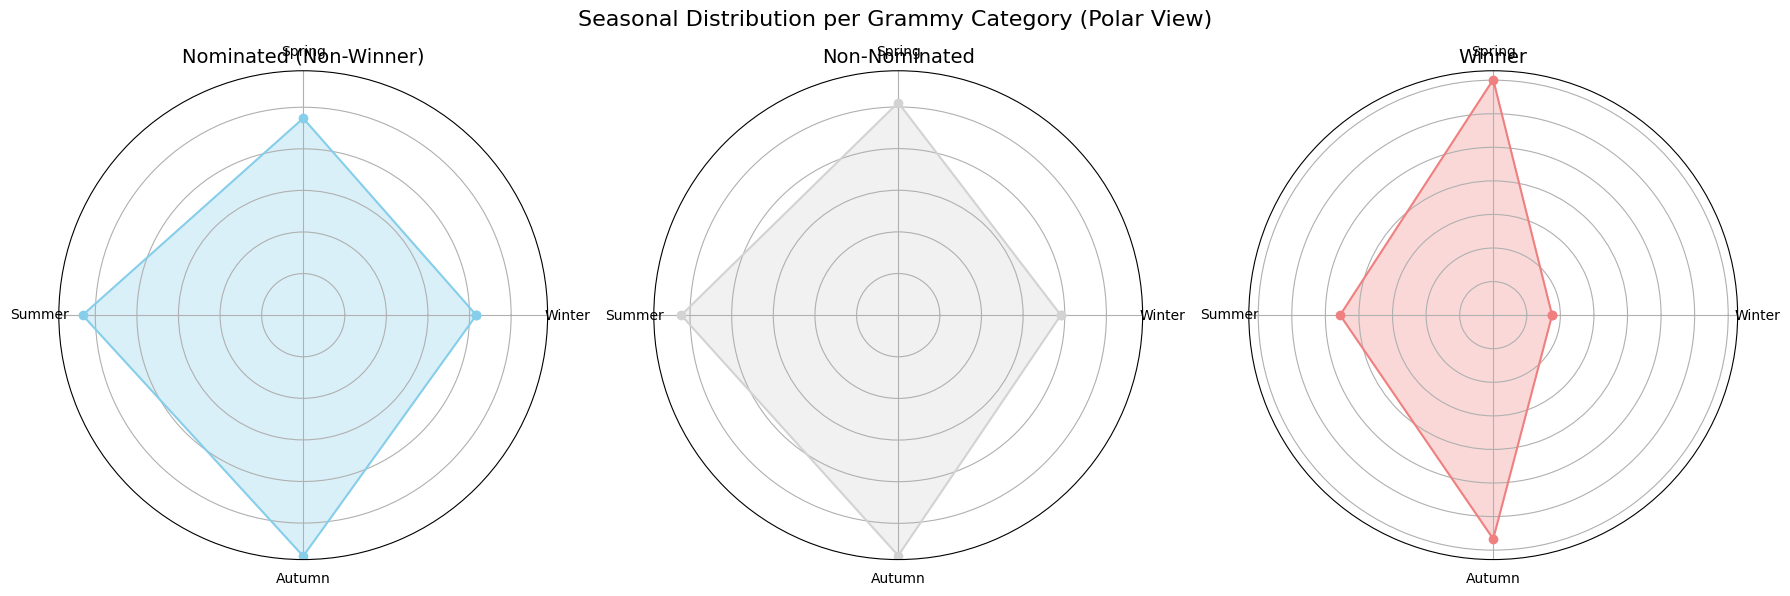

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define season order and corresponding angles
season_order = ["Winter", "Spring", "Summer", "Autumn"]
angles = np.linspace(0, 2 * np.pi, len(season_order), endpoint=False).tolist()
angles += angles[:1]  # To close the circle

# Category color mapping
category_colors = {
    "Winner": "lightcoral",
    "Nominated (Non-Winner)": "skyblue",
    "Non-Nominated": "lightgrey"
}

# Prepare subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

# Loop through each category and create a polar plot
for ax, category in zip(axes, df_season_grouped["Category"].unique()):
    data = df_season_grouped[df_season_grouped["Category"] == category]
    data = data.set_index("Season").reindex(season_order).fillna(0)

    values = data["percentage"].tolist()
    values += values[:1]  # Close the loop

    ax.plot(angles, values, marker='o', color=category_colors[category], label=category)
    ax.fill(angles, values, alpha=0.3, color=category_colors[category])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(season_order)
    ax.set_yticklabels([])
    ax.set_title(category, fontsize=14)

# Title and layout
plt.suptitle("Seasonal Distribution per Grammy Category (Polar View)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
 df_season_grouped

Grouped Category  Season  count  true_total  percentage
3  Nominated or Winner  Winter     56         303   18.481848
7        Non-Nominated  Winter   2062       10559   19.528364
1  Nominated or Winner  Spring     79         303   26.072607
5        Non-Nominated  Spring   2695       10559   25.523250
2  Nominated or Winner  Summer     78         303   25.742574
6        Non-Nominated  Summer   2752       10559   26.063074
0  Nominated or Winner  Autumn     90         303   29.702970
4        Non-Nominated  Autumn   3050       10559   28.885311

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table: rows = Category, columns = Season
contingency_table = pd.pivot_table(
    df_season_grouped,
    values="count",
    index="Grouped Category",
    columns="Season",
    aggfunc="sum",
    fill_value=0
)

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Optional: interpret the result
if p < 0.05:
    print("There is a statistically significant association between Category and Season.")
else:
    print("No statistically significant association between Category and Season.")


Chi-squared Test Results:
Chi2 Statistic: 0.2800
Degrees of Freedom: 3
P-value: 0.9637
No statistically significant association between Category and Season.


<ipython-input-162-ef7f944b54ba>:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



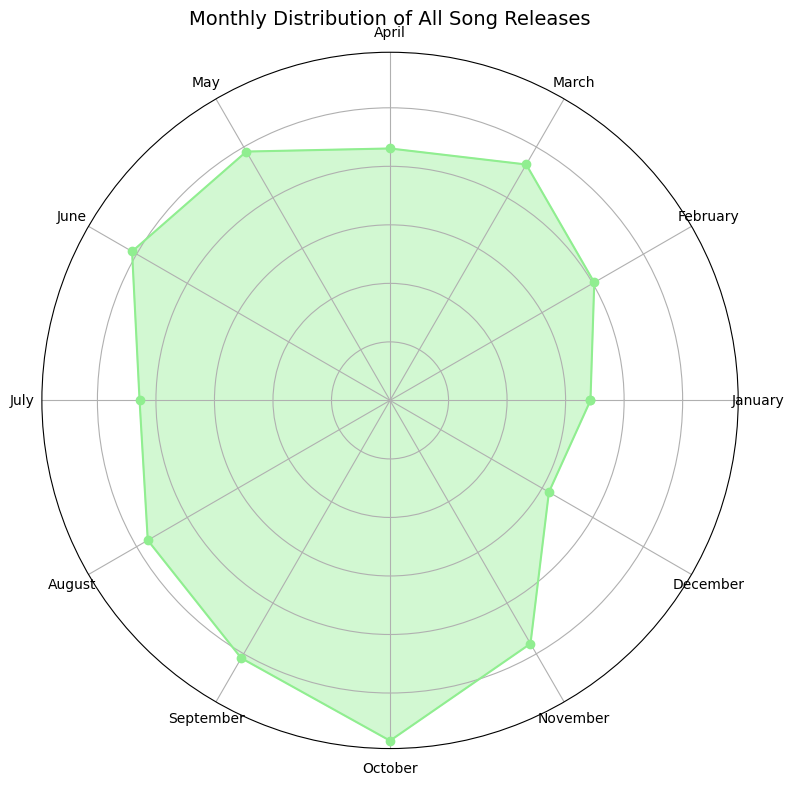

In [ ]:
#overall distrivution of all our songs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

release_counts = songs_charts_df["Release Month"].value_counts().reindex(month_order).fillna(0)

# Convert data to angles
angles = np.linspace(0, 2 * np.pi, len(month_order), endpoint=False).tolist()
counts = release_counts.values.tolist()

# Close the circle
angles += angles[:1]
counts += counts[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, counts, color='lightgreen', marker='o')
ax.fill(angles, counts, color='lightgreen', alpha=0.4)

# Add month labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(month_order)

ax.set_title("Monthly Distribution of All Song Releases", fontsize=14, pad=20)
ax.set_yticklabels([])  # Optional: hide radial ticks
plt.tight_layout()
plt.show()


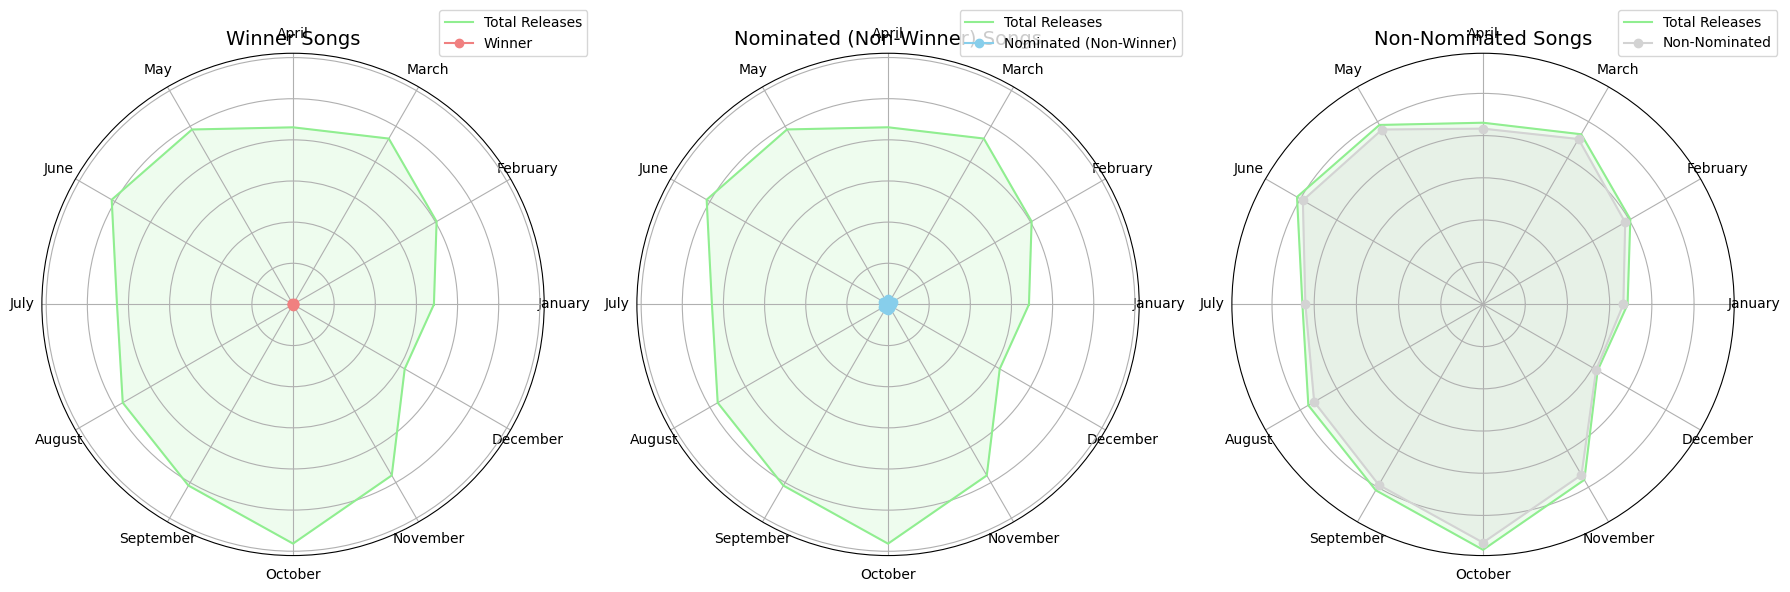

In [ ]:

total_counts = songs_charts_df["Release Month"].value_counts().reindex(month_order).fillna(0)
total_values = total_counts.tolist() + [total_counts.tolist()[0]]  # wraparound for polar
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()
angles += angles[:1]


# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})
statuses = ["Winner", "Nominated (Non-Winner)", "Non-Nominated"]

for ax, status in zip(axes, statuses):
    # Filter by status and count per month
    status_data = songs_charts_df[songs_charts_df["Status"] == status]
    status_counts = status_data["Release Month"].value_counts().reindex(month_order).fillna(0)
    status_values = status_counts.tolist() + [status_counts.tolist()[0]]

    # Plot base in gray
    ax.plot(angles, total_values, color='lightgreen', linewidth=1.5, label='Total Releases')
    ax.fill(angles, total_values, color='lightgreen', alpha=0.15)

    # Overlay status line
    ax.plot(angles, status_values, marker='o', color=status_palette[status], label=status)
    ax.fill(angles, status_values, color=status_palette[status], alpha=0.25)

    # Customize ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(month_order)
    ax.set_yticklabels([])

    ax.set_title(f"{status} Songs", fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


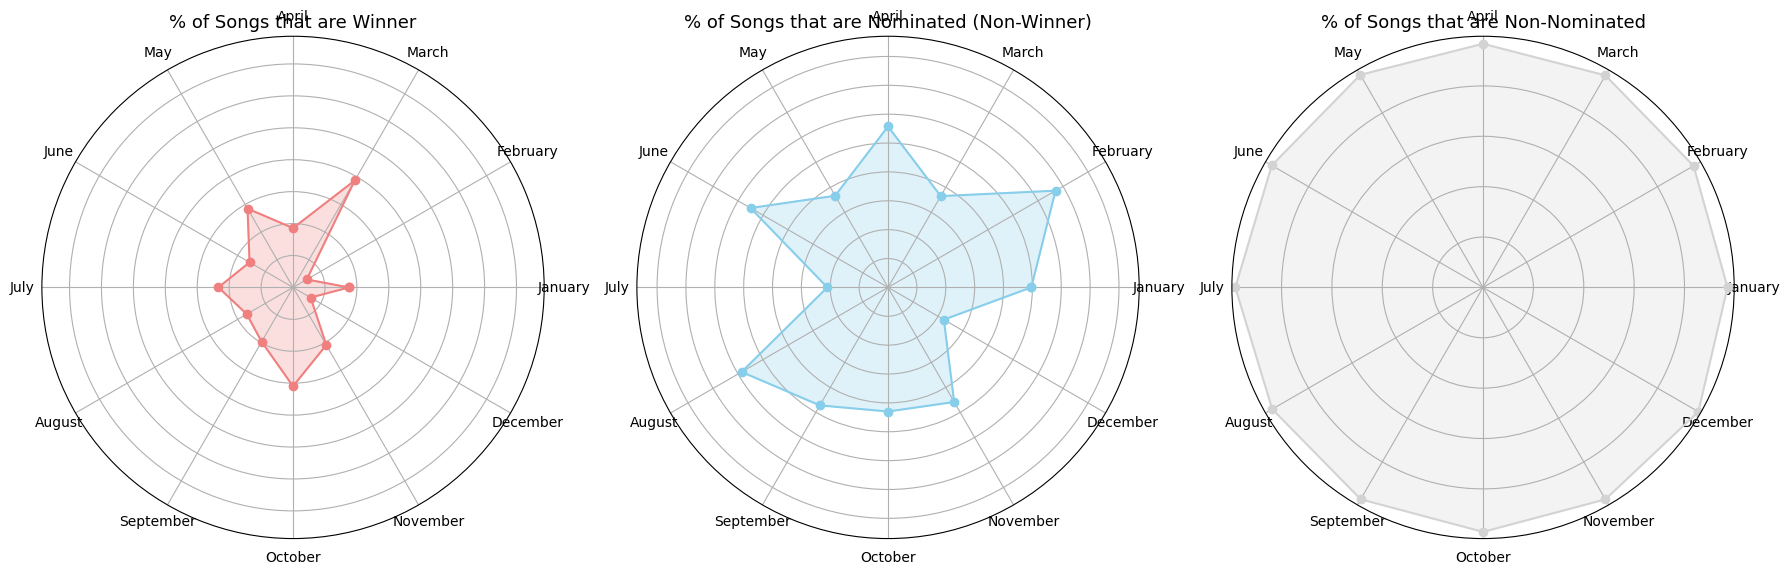

In [ ]:

total_per_month = songs_charts_df["Release Month"].value_counts().reindex(month_order).fillna(0)

# Function to compute monthly percentage per category
def compute_monthly_percentage(status):
    subset = songs_charts_df[songs_charts_df["Status"] == status]
    status_counts = subset["Release Month"].value_counts().reindex(month_order).fillna(0)
    percentages = (status_counts / total_per_month.replace(0, np.nan)) * 100
    return percentages.fillna(0).tolist()

# Prepare data for each category
categories = ["Winner", "Nominated (Non-Winner)", "Non-Nominated"]
all_percentages = [compute_monthly_percentage(cat) for cat in categories]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create one polar subplot per category
for ax, category, values in zip(axes, categories, all_percentages):
    values += values[:1]  # repeat the first value to close the plot

    # Plot
    ax.plot(angles, values, marker='o', color=status_palette[category])
    ax.fill(angles, values, alpha=0.25, color=status_palette[category])

    # Set ticks and labels
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(month_order)
    ax.set_yticklabels([])
    ax.set_ylim(0, max(values) + 1)  # Independent scale with padding
    ax.set_title(f"% of Songs that are {category}", fontsize=13)

plt.tight_layout()
plt.show()


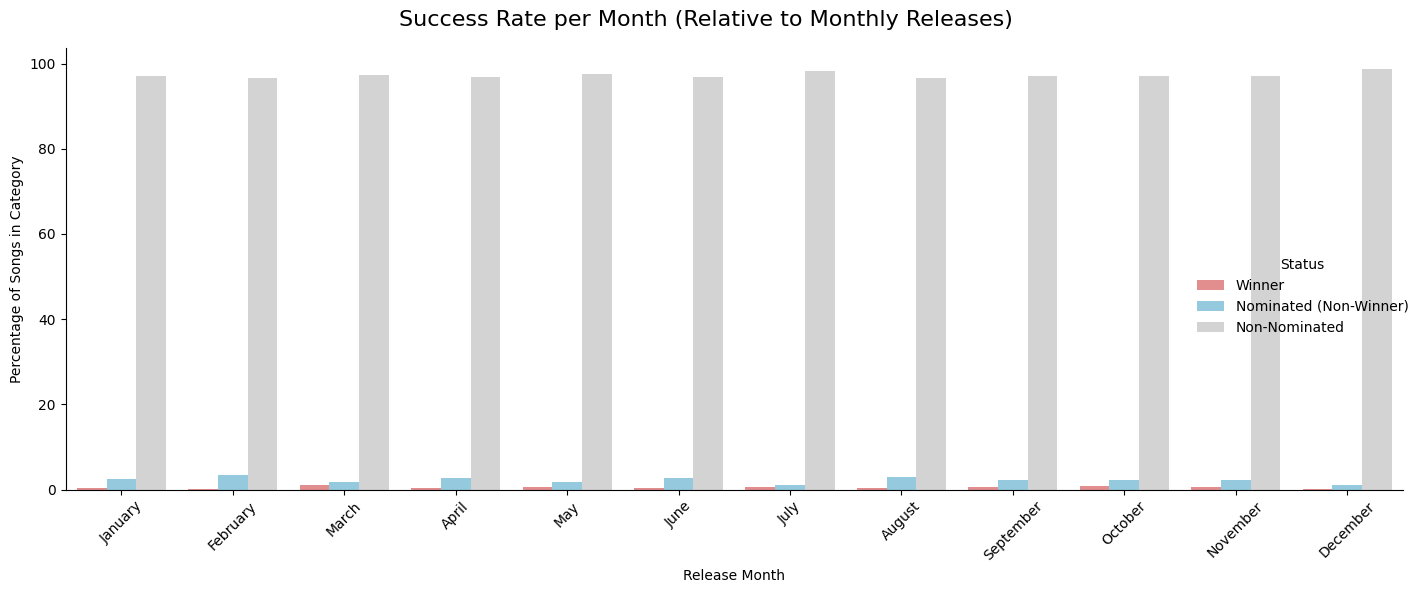

In [ ]:


# Get total songs released per month
total_counts = songs_charts_df["Release Month"].value_counts().reindex(month_order).fillna(0)

# Prepare percentages for each status
percent_data = []
for status in status_palette.keys():
    status_df = songs_charts_df[songs_charts_df["Status"] == status]
    counts = status_df["Release Month"].value_counts().reindex(month_order).fillna(0)
    percentages = (counts / total_counts.replace(0, pd.NA)) * 100
    percent_data.append(percentages)

# Create DataFrame for plotting
df_percent = pd.DataFrame(percent_data, index=status_palette.keys()).T.reset_index()
df_percent = df_percent.rename(columns={"index": "Month"})
df_percent = df_percent.melt(id_vars="Month", var_name="Status", value_name="Percentage")

# Plot
g = sns.catplot(
    data=df_percent,
    kind="bar",
    x="Month",
    y="Percentage",
    hue="Status",
    palette=status_palette,
    height=6,
    aspect=2
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Release Month", "Percentage of Songs in Category")
g.fig.suptitle("Success Rate per Month (Relative to Monthly Releases)", fontsize=16)
plt.tight_layout()
plt.show()
